In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

In [2]:
data=pd.read_csv("E:\Data_mites_projects\house pred\PRCP-1020-HousePricePred\Data\data.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [4]:
df.nunique()


Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 


Unique values in column 'Id': [   1    2    3 ... 1458 1459 1460]
Unique values in column 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values in column 'LotFrontage': [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column 'LotArea': [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column 'Street': ['Pave' 'Grvl']
Unique values in column 'Alley': [na

In [6]:
df.index

RangeIndex(start=0, stop=1460, step=1)

In [7]:
df.shape

(1460, 81)

In [8]:
column = df.columns 
for i in column:
    print(df.dtypes[i])

int64
int64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
int64
int64
int64
int64
object
object
object
object
object
float64
object
object
object
object
object
object
object
int64
object
int64
int64
int64
object
object
object
object
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
object
int64
object
object
float64
object
int64
int64
object
object
object
int64
int64
int64
int64
int64
int64
object
object
object
int64
int64
int64
object
object
int64


In [9]:
#Checking for null values
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
for column in data.columns:
    missing_count = data[column].isnull().sum()
    print(f"{column} = {missing_count}")

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Neighborhood = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 872
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF

In [11]:
data1=df.copy()

In [12]:
print(data1.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
data1.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [14]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [15]:
# Define a mapping of categorical to numerical values
zoning_mapping = {
    'A': 1,    # Agriculture
    'RP': 2,   # Residential Low Density Park
    'RL': 3,   # Residential Low Density
    'RM': 4,   # Residential Medium Density
    'RH': 5,   # Residential High Density
    'FV': 6,   # Floating Village Residential
    'C': 7,    # Commercial
    'I': 8     # Industrial
}

# Apply the mapping to the MSZoning column in data1 DataFrame
data1['MSZoning'] = data1['MSZoning'].map(zoning_mapping)

# Now the MSZoning column is updated with numerical values.


In [16]:
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       3.0         65.0     8450   Pave   NaN      Reg   
1   2          20       3.0         80.0     9600   Pave   NaN      Reg   
2   3          60       3.0         68.0    11250   Pave   NaN      IR1   
3   4          70       3.0         60.0     9550   Pave   NaN      IR1   
4   5          60       3.0         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [17]:
# Create a mapping based on the ordinal values
street_rank = {'Pave': 2, 'Grvl': 1}

# Map the 'Street' column to the numerical rank
data1['Street'] = data1['Street'].map(street_rank)

# Display the modified DataFrame
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley LotShape  \
0   1          60       3.0         65.0     8450       2   NaN      Reg   
1   2          20       3.0         80.0     9600       2   NaN      Reg   
2   3          60       3.0         68.0    11250       2   NaN      IR1   
3   4          70       3.0         60.0     9550       2   NaN      IR1   
4   5          60       3.0         84.0    14260       2   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [18]:
# Create a mapping based on the ordinal values
lot_shape_rank = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1}

# Map the 'LotShape' column to the numerical rank
data1['LotShape'] = data1['LotShape'].map(lot_shape_rank)

# Display the modified DataFrame
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60       3.0         65.0     8450       2   NaN         4   
1   2          20       3.0         80.0     9600       2   NaN         4   
2   3          60       3.0         68.0    11250       2   NaN         3   
3   4          70       3.0         60.0     9550       2   NaN         3   
4   5          60       3.0         84.0    14260       2   NaN         3   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [19]:
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60       3.0         65.0     8450       2   NaN         4   
1   2          20       3.0         80.0     9600       2   NaN         4   
2   3          60       3.0         68.0    11250       2   NaN         3   
3   4          70       3.0         60.0     9550       2   NaN         3   
4   5          60       3.0         84.0    14260       2   NaN         3   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [20]:
# Create a mapping for each categorical column
land_contour_rank = {'Lvl': 4, 'Bnk': 3, 'HLS': 2, 'Low': 1}
utilities_rank = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1}
lot_config_rank = {'Inside': 1, 'Corner': 2, 'CulDSac': 3, 'FR2': 4, 'FR3': 5}
land_slope_rank = {'Gtl': 3, 'Mod': 2, 'Sev': 1}
condition_rank = {'Norm': 1, 'Feedr': 2, 'PosN': 3, 'Artery': 4, 'RRAe': 5, 'RRNn': 6, 'RRAn': 7, 'PosA': 8, 'RRNe': 9}
bldg_type_rank = {'1Fam': 5, '2fmCon': 4, 'Duplex': 3, 'TwnhsE': 2, 'Twnhs': 1}
house_style_rank = {'2Story': 5, '1Story': 4, '1.5Fin': 3, '1.5Unf': 2, 'SFoyer': 1, 'SLvl': 1, '2.5Fin': 4, '2.5Unf': 3}

# Map the categorical columns to the numerical rankings
data1['LandContour'] = data1['LandContour'].map(land_contour_rank)
data1['Utilities'] = data1['Utilities'].map(utilities_rank)
data1['LotConfig'] = data1['LotConfig'].map(lot_config_rank)
data1['LandSlope'] = data1['LandSlope'].map(land_slope_rank)
data1['Condition1'] = data1['Condition1'].map(condition_rank)
data1['Condition2'] = data1['Condition2'].map(condition_rank)
data1['BldgType'] = data1['BldgType'].map(bldg_type_rank)
data1['HouseStyle'] = data1['HouseStyle'].map(house_style_rank)
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60       3.0         65.0     8450       2   NaN         4   
1   2          20       3.0         80.0     9600       2   NaN         4   
2   3          60       3.0         68.0    11250       2   NaN         3   
3   4          70       3.0         60.0     9550       2   NaN         3   
4   5          60       3.0         84.0    14260       2   NaN         3   

   LandContour  Utilities  ...  PoolArea  PoolQC Fence  MiscFeature  MiscVal  \
0            4          4  ...         0     NaN   NaN          NaN        0   
1            4          4  ...         0     NaN   NaN          NaN        0   
2            4          4  ...         0     NaN   NaN          NaN        0   
3            4          4  ...         0     NaN   NaN          NaN        0   
4            4          4  ...         0     NaN   NaN          NaN        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2008        WD         Normal     208500  
1       5    2007        WD         Normal     181500  
2       9    2008        WD         Normal     223500  
3       2    2006        WD        Abnorml     140000  
4      12    2008        WD         Normal     250000  

[5 rows x 81 columns]

In [21]:
import pandas as pd

# Assuming you have already loaded your dataset into data1

# Create a mapping for neighborhoods based on desirability
neighborhood_rank = {
    'CollgCr': 1,
    'NridgHt': 2,
    'NoRidge': 3,
    'NWAmes': 4,
    'Edwards': 5,
    'Sawyer': 6,
    'Somerst': 7,
    'Timber': 8,
    'Blmngtn': 9,
    'BrkSide': 10,
    'Crawfor': 11,
    'OldTown': 12,
    'Veenker': 13,
    'IDOTRR': 14,
    'ClearCr': 15,
    'Gilbert': 16,
    'MeadowV': 17,
    'SawyerW': 18,
    'StoneBr': 19,
    'SWISU': 20,
    'Blueste': 21,
    'BrDale': 22,
    'NPkVill': 23,
}

# Map the neighborhoods to their corresponding ranks
data1['NeighborhoodRank'] = data1['Neighborhood'].map(neighborhood_rank)

# Display the modified DataFrame with the new NeighborhoodRank column
print(data1[['Neighborhood', 'NeighborhoodRank']].head())


  Neighborhood  NeighborhoodRank
0      CollgCr               1.0
1      Veenker              13.0
2      CollgCr               1.0
3      Crawfor              11.0
4      NoRidge               3.0


In [22]:
data1=data1.drop('Neighborhood', axis=1)
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60       3.0         65.0     8450       2   NaN         4   
1   2          20       3.0         80.0     9600       2   NaN         4   
2   3          60       3.0         68.0    11250       2   NaN         3   
3   4          70       3.0         60.0     9550       2   NaN         3   
4   5          60       3.0         84.0    14260       2   NaN         3   

   LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  MiscVal  MoSold  \
0            4          4  ...     NaN    NaN          NaN        0       2   
1            4          4  ...     NaN    NaN          NaN        0       5   
2            4          4  ...     NaN    NaN          NaN        0       9   
3            4          4  ...     NaN    NaN          NaN        0       2   
4            4          4  ...     NaN    NaN          NaN        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  NeighborhoodRank  
0    2008        WD         Normal     208500               1.0  
1    2007        WD         Normal     181500              13.0  
2    2008        WD         Normal     223500               1.0  
3    2006        WD        Abnorml     140000              11.0  
4    2008        WD         Normal     250000               3.0  

[5 rows x 81 columns]

In [23]:
for column in data1.columns:
    missing_count = data1[column].isnull().sum()
    print(f"{column} = {missing_count}")

Id = 0
MSSubClass = 0
MSZoning = 10
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 872
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 37
BsmtCond = 37
BsmtExposure = 38
BsmtFinType1 = 37
BsmtFinSF1 = 0
BsmtFinType2 = 38
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 1
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 690
GarageType = 81
GarageYrBlt = 81
GarageFinish = 81
GarageCars = 0
GarageArea = 0
GarageQual = 81
GarageCond = 81
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF

In [24]:
# data1=data1.drop("Alley", axis=1)
# data1.head()

In [25]:
# #import pandas as pd

# # Load your dataset
# #data = pd.read_csv('house_prices.csv')

# # List of categorical columns
# categorical_columns = ['Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
#                        'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 
#                        'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
#                        'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
#                        'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 
#                        'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 
#                        'MiscFeature', 'SaleType', 'SaleCondition']

# # Function to display mean SalePrice for each unique category
# def show_mean_values(data1, column):
#     mean_values = df.groupby(column)['SalePrice'].mean()
#     print(f"Mean SalePrice for {column}:\n", mean_values)
#     print("\n" + "-"*50 + "\n")

# # Apply to each column
# for col in categorical_columns:
#     show_mean_values(data1, col)


In [26]:
# Define priority mappings for each feature
priority_mappings = {
    'Condition1': {'PosN': 1, 'Norm': 2, 'Artery': 3, 'Feedr': 4, 'RRNn': 5, 'RRAn': 6, 'NA': 7},
    'Condition2': {'PosN': 1, 'Norm': 2, 'Artery': 3, 'Feedr': 4, 'RRNn': 5, 'RRAn': 6, 'NA': 7},
    'BldgType': {'1Fam': 1, 'TwnhsE': 2, 'TwnhsI': 3, 'Duplx': 4, '2FmCon': 5, 'NA': 6},
    'HouseStyle': {'2Story': 1, '1Story': 2, 'SFoyer': 3, 'SLvl': 4, '2.5Fin': 5, '1.5Fin': 6, '2.5Unf': 7, '1.5Unf': 8, 'NA': 9},
    'RoofStyle': {'Gable': 1, 'Hip': 2, 'Gambrel': 3, 'Mansard': 4, 'Flat': 5, 'Shed': 6, 'NA': 7},
    'RoofMatl': {'ClyTile': 1, 'WdShngl': 2, 'WdShake': 3, 'CompShg': 4, 'Tar&Grv': 5, 'Metal': 6, 'Membran': 7, 'Roll': 8, 'NA': 9},
    'Exterior1st': {'Stone': 1, 'BrkFace': 2, 'CemntBd': 3, 'Stucco': 4, 'VinylSd': 5, 'HdBoard': 6, 'Wd Sdng': 7, 'Plywood': 8, 'AsbShng': 9, 'NA': 10},
    'MasVnrType': {'Stone': 1, 'BrkFace': 2, 'BrkCmn': 3, 'CBlock': 4, 'None': 5, 'NA': 6},
    'ExterQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'ExterCond': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'Foundation': {'PConc': 1, 'BrkTil': 2, 'Stone': 3, 'CBlock': 4, 'Slab': 5, 'Wood': 6, ' NA': 7},
    'BsmtQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'BsmtCond': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'BsmtFinType2': {'Unf': 0,'BLQ': 1,'ALQ': 2,'Rec': 3,'LwQ': 4,'GLQ': 5,'nan': -1},
    'exterior2nd_map' : {'VinylSd': 0,'MetalSd': 1,'Wd Shng': 2,'HdBoard': 3,'Plywood': 4,'Wd Sdng': 5,'CmentBd': 6,'BrkFace': 7,'Stucco': 8,'AsbShng': 9,'Brk Cmn': 10,'ImStucc': 11,'AsphShn': 12,'Stone': 13,'Other': 14,'CBlock': 15},
    'BsmtExposure': {'Gd': 1, 'Av': 2, 'Mn': 3, 'No': 4, 'NA': 5},
    'BsmtFinType1': {'GLQ': 1, 'ALQ': 2, 'BLQ': 3, 'Rec': 4, 'LwQ': 5, 'Unf': 6, 'NA': 7},
    'Heating': {'GasA': 1, 'GasW': 2, 'OthW': 3, 'Grav': 4, 'Floor': 5, 'Wall': 6, 'NA': 7},
    'HeatingQC': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'CentralAir': {'Y': 1, 'N': 2, 'NA': 3},
    'Electrical': {'SBrkr': 1, 'FuseA': 2, 'FuseF': 3, 'FuseP': 4, 'Mix': 5, 'NA': 6},
    'KitchenQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'Functional': {'Typ': 1, 'Min1': 2, 'Min2': 3, 'Mod': 4, 'Maj1': 5, 'Maj2': 6, 'Sev': 7, 'Sal': 8, 'NA': 9},
    'FireplaceQu': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'GarageType': {'Attchd': 1, 'BuiltIn': 2, 'Detchd': 3, 'Basment': 4, 'CarPort': 5, '2Types': 6, 'NA': 7},
    'GarageFinish': {'Fin': 1, 'RFn': 2, 'Unf': 3, 'NA': 4},
    'GarageQual': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'GarageCond': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'Po': 5, 'NA': 6},
    'PavedDrive': {'Y': 1, 'P': 2, 'N': 3, 'NA': 4},
    'PoolQC': {'Ex': 1, 'Gd': 2, 'TA': 3, 'Fa': 4, 'NA': 5},
    'Fence': {'GdPrv': 1, 'MnPrv': 2, 'GdWo': 3, 'MnWw': 4, 'NA': 5},
    'MiscFeature': {'Elev': 1, 'Gar2': 2, 'TenC': 3, 'Shed': 4, 'Othr': 5, 'NA': 6},
    'SaleType': {'New': 1, 'WD': 2, 'CWD': 3, 'VWD': 4, 'Con': 5, 'ConLw': 6, 'ConLD': 7, 'ConLI': 8, 'COD': 9, 'Oth': 10, 'NA': 11},
    'SaleCondition': {'Normal': 1, 'Partial': 2, 'Alloca': 3, 'Family': 4, 'AdjLand': 5, 'Abnorml': 6, 'NA': 7},
}

# Update the existing columns in the DataFrame with mapped values
for column, mapping in priority_mappings.items():
    if column in data1.columns:
        data1[column] = data1[column].replace([np.nan, 'nan', 'NAN', 'NA', 0], 'NA').astype(str).map(mapping).fillna(0).astype(int)

# Check the result of applying the priority mappings
print(data1.head())


   Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street Alley  LotShape  \
0   1          60       3.0         65.0     8450       2   NaN         4   
1   2          20       3.0         80.0     9600       2   NaN         4   
2   3          60       3.0         68.0    11250       2   NaN         3   
3   4          70       3.0         60.0     9550       2   NaN         3   
4   5          60       3.0         84.0    14260       2   NaN         3   

   LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  MiscVal  MoSold  \
0            4          4  ...       5      5            6        0       2   
1            4          4  ...       5      5            6        0       5   
2            4          4  ...       5      5            6        0       9   
3            4          4  ...       5      5            6        0       2   
4            4          4  ...       5      5            6        0      12   

   YrSold  SaleType  SaleCondition  SalePrice  NeighborhoodRan

In [27]:
for column in data1.columns:
    unique_values = data1[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 


Unique values in column 'Id': [   1    2    3 ... 1458 1459 1460]
Unique values in column 'MSSubClass': [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
Unique values in column 'MSZoning': [ 3.  4. nan  6.  5.]
Unique values in column 'LotFrontage': [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
Unique values in column 'LotArea': [ 8450  9600 11250 ... 17217 13175  9717]
Unique values in column 'Street': [2 1]
Unique values in column 'Alley': [nan 'Grvl' 'Pave']
Uni

In [28]:
for column in data1.columns:
    missing_count = data1[column].isnull().sum()
    print(f"{column} = {missing_count}")

Id = 0
MSSubClass = 0
MSZoning = 10
LotFrontage = 259
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 0
MasVnrArea = 8
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinSF1 = 0
BsmtFinType2 = 0
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 0
GarageType = 0
GarageYrBlt = 81
GarageFinish = 0
GarageCars = 0
GarageArea = 0
GarageQual = 0
GarageCond = 0
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
Enclosed

In [29]:
# Replace null values with the mean of the respective columns for numeric columns
for column in data1.columns:
    if data1[column].isnull().sum() > 0:  # Check for missing values
        # Check if the column is numeric
        if pd.api.types.is_numeric_dtype(data1[column]):
            mean_value = data1[column].mean()  # Calculate the mean
            data1[column] = data1[column].fillna(mean_value)  # Replace NaN with mean

# Check the result to ensure no missing values remain
missing_counts_after = data1.isnull().sum()
print(missing_counts_after)


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
                   ..
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
NeighborhoodRank    0
Length: 81, dtype: int64


In [30]:
for column in data1.columns:
    missing_count = data1[column].isnull().sum()
    print(f"{column} = {missing_count}")

Id = 0
MSSubClass = 0
MSZoning = 0
LotFrontage = 0
LotArea = 0
Street = 0
Alley = 1369
LotShape = 0
LandContour = 0
Utilities = 0
LotConfig = 0
LandSlope = 0
Condition1 = 0
Condition2 = 0
BldgType = 0
HouseStyle = 0
OverallQual = 0
OverallCond = 0
YearBuilt = 0
YearRemodAdd = 0
RoofStyle = 0
RoofMatl = 0
Exterior1st = 0
Exterior2nd = 0
MasVnrType = 0
MasVnrArea = 0
ExterQual = 0
ExterCond = 0
Foundation = 0
BsmtQual = 0
BsmtCond = 0
BsmtExposure = 0
BsmtFinType1 = 0
BsmtFinSF1 = 0
BsmtFinType2 = 0
BsmtFinSF2 = 0
BsmtUnfSF = 0
TotalBsmtSF = 0
Heating = 0
HeatingQC = 0
CentralAir = 0
Electrical = 0
1stFlrSF = 0
2ndFlrSF = 0
LowQualFinSF = 0
GrLivArea = 0
BsmtFullBath = 0
BsmtHalfBath = 0
FullBath = 0
HalfBath = 0
BedroomAbvGr = 0
KitchenAbvGr = 0
KitchenQual = 0
TotRmsAbvGrd = 0
Functional = 0
Fireplaces = 0
FireplaceQu = 0
GarageType = 0
GarageYrBlt = 0
GarageFinish = 0
GarageCars = 0
GarageArea = 0
GarageQual = 0
GarageCond = 0
PavedDrive = 0
WoodDeckSF = 0
OpenPorchSF = 0
EnclosedPorc

In [31]:
# Replace NaN in BsmtFinType2 with the most common value (mode)
mode_value = data1['BsmtFinType2'].mode()[0]  # Calculate the mode
data1['BsmtFinType2'].fillna(mode_value, inplace=True)  # Replace NaN with mode

# Check the result
missing_count_after = data1['BsmtFinType2'].isnull().sum()
print(f"Remaining missing values in 'BsmtFinType2': {missing_count_after}")



Remaining missing values in 'BsmtFinType2': 0


C:\Users\user\AppData\Local\Temp\ipykernel_7224\2508091201.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['BsmtFinType2'].fillna(mode_value, inplace=True)  # Replace NaN with mode


In [32]:
data1=data1.drop("Alley", axis=1)
data1.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0   1          60       3.0         65.0     8450       2         4   
1   2          20       3.0         80.0     9600       2         4   
2   3          60       3.0         68.0    11250       2         3   
3   4          70       3.0         60.0     9550       2         3   
4   5          60       3.0         84.0    14260       2         3   

   LandContour  Utilities  LotConfig  ...  PoolQC  Fence  MiscFeature  \
0            4          4          1  ...       5      5            6   
1            4          4          4  ...       5      5            6   
2            4          4          1  ...       5      5            6   
3            4          4          2  ...       5      5            6   
4            4          4          4  ...       5      5            6   

   MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  \
0        0       2    2008         2              1     208500   
1        0       5    2007         2              1     181500   
2        0       9    2008         2              1     223500   
3        0       2    2006         2              6     140000   
4        0      12    2008         2              1     250000   

   NeighborhoodRank  
0               1.0  
1              13.0  
2               1.0  
3              11.0  
4               3.0  

[5 rows x 80 columns]

In [33]:
data1=data1.drop("Id", axis=1)
data1.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  LandContour  \
0          60       3.0         65.0     8450       2         4            4   
1          20       3.0         80.0     9600       2         4            4   
2          60       3.0         68.0    11250       2         3            4   
3          70       3.0         60.0     9550       2         3            4   
4          60       3.0         84.0    14260       2         3            4   

   Utilities  LotConfig  LandSlope  ...  PoolQC  Fence  MiscFeature  MiscVal  \
0          4          1          3  ...       5      5            6        0   
1          4          4          3  ...       5      5            6        0   
2          4          1          3  ...       5      5            6        0   
3          4          2          3  ...       5      5            6        0   
4          4          4          3  ...       5      5            6        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  NeighborhoodRank  
0       2    2008         2              1     208500               1.0  
1       5    2007         2              1     181500              13.0  
2       9    2008         2              1     223500               1.0  
3       2    2006         2              6     140000              11.0  
4      12    2008         2              1     250000               3.0  

[5 rows x 79 columns]

In [34]:
for column in data1.columns:
    missing_count = data1[column].dtype
    print(f"{column} = {missing_count}")

MSSubClass = int64
MSZoning = float64
LotFrontage = float64
LotArea = int64
Street = int64
LotShape = int64
LandContour = int64
Utilities = int64
LotConfig = int64
LandSlope = int64
Condition1 = int64
Condition2 = int64
BldgType = int64
HouseStyle = int64
OverallQual = int64
OverallCond = int64
YearBuilt = int64
YearRemodAdd = int64
RoofStyle = int64
RoofMatl = int64
Exterior1st = int64
Exterior2nd = object
MasVnrType = int64
MasVnrArea = float64
ExterQual = int64
ExterCond = int64
Foundation = int64
BsmtQual = int64
BsmtCond = int64
BsmtExposure = int64
BsmtFinType1 = int64
BsmtFinSF1 = int64
BsmtFinType2 = int64
BsmtFinSF2 = int64
BsmtUnfSF = int64
TotalBsmtSF = int64
Heating = int64
HeatingQC = int64
CentralAir = int64
Electrical = int64
1stFlrSF = int64
2ndFlrSF = int64
LowQualFinSF = int64
GrLivArea = int64
BsmtFullBath = int64
BsmtHalfBath = int64
FullBath = int64
HalfBath = int64
BedroomAbvGr = int64
KitchenAbvGr = int64
KitchenQual = int64
TotRmsAbvGrd = int64
Functional = int6

In [35]:
for column in data1.select_dtypes(include=np.number):  # Select numerical columns
  skewness=stats.skew(data1[column])
  kurtosis= stats.kurtosis(data1[column])
  print(f'{column}=   skew = {skewness}\n kutosis = {kurtosis}')

MSSubClass=   skew = 1.4062101115313512
 kutosis = 1.5706747728574895
MSZoning=   skew = 2.6838285949796736
 kutosis = 6.8820414025515255
LotFrontage=   skew = 2.382499177054863
 kutosis = 21.76930784887213
LotArea=   skew = 12.195142125084478
 kutosis = 202.5437927513529
Street=   skew = -15.50282102976064
 kutosis = 238.33745988078869
LotShape=   skew = -1.3086393966002137
 kutosis = 1.7695758976800118
LandContour=   skew = -3.4628175645150447
 kutosis = 11.342819606678585
Utilities=   skew = -38.17067834609388
 kutosis = 1455.0006854009598
LotConfig=   skew = 1.9918118338282909
 kutosis = 3.529442064590782
LandSlope=   skew = -4.808735448272337
 kutosis = 24.50934105741594
Condition1=   skew = nan
 kutosis = nan
Condition2=   skew = nan
 kutosis = nan
BldgType=   skew = nan
 kutosis = nan
HouseStyle=   skew = nan
 kutosis = nan
OverallQual=   skew = 0.2167209765258641
 kutosis = 0.091856548449611
OverallCond=   skew = 0.6923552135520978
 kutosis = 1.0985212295913955
YearBuilt=   ske

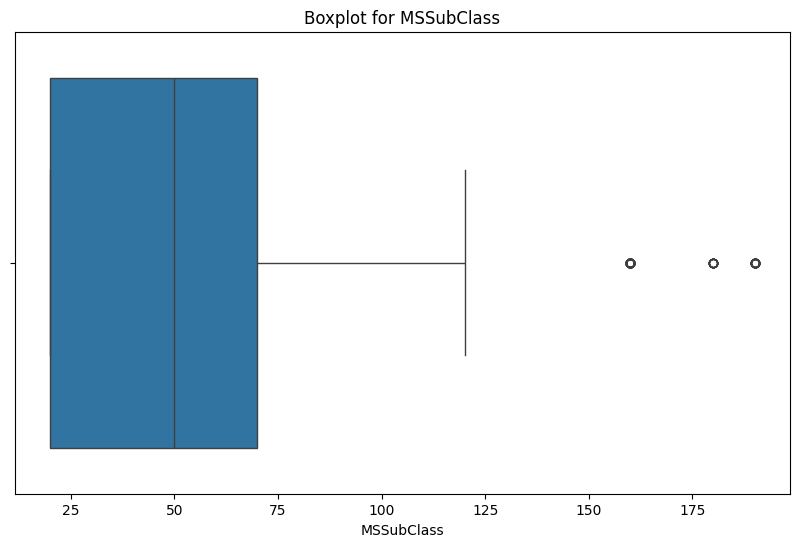

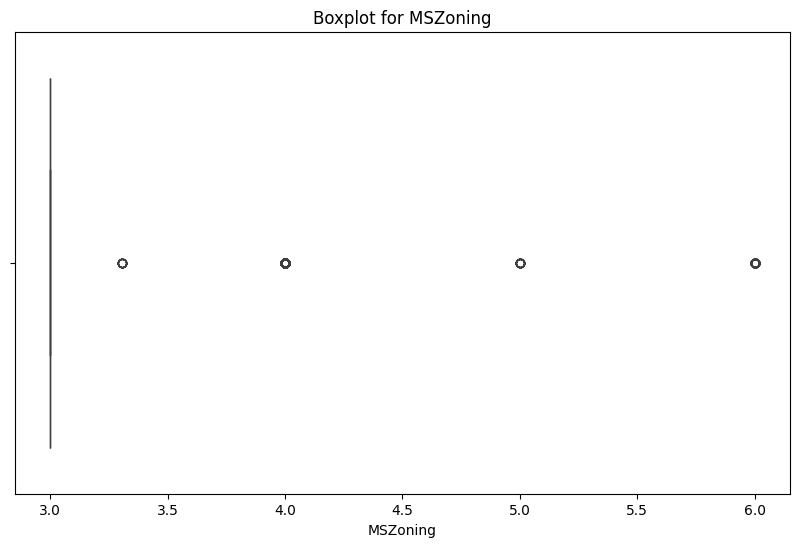

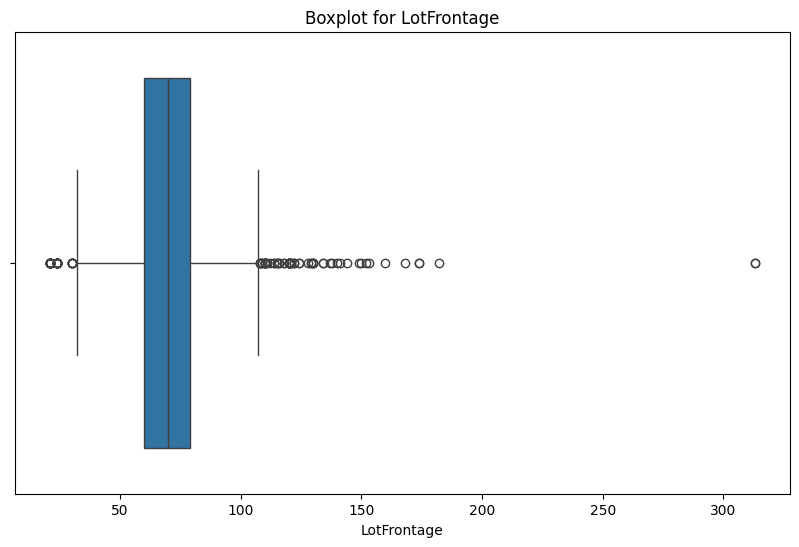

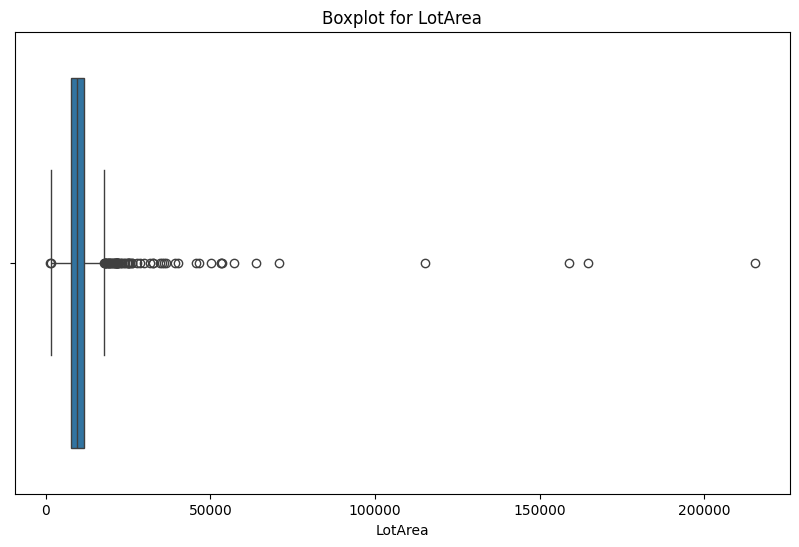

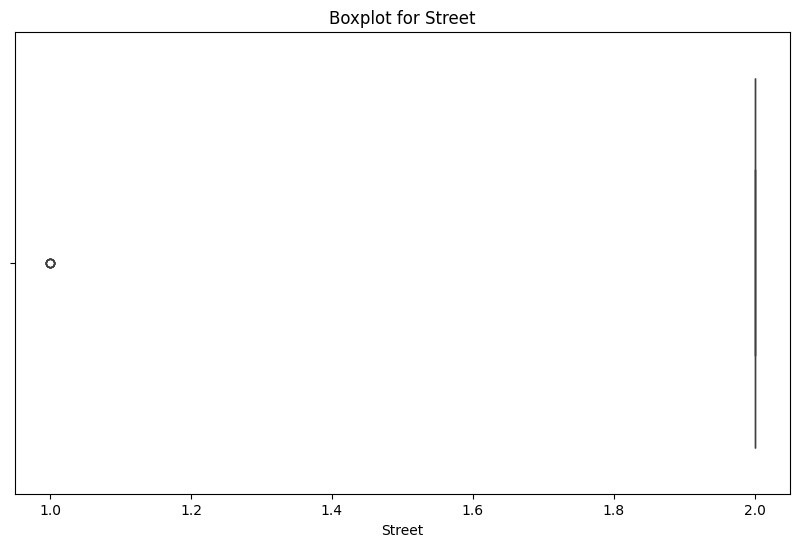

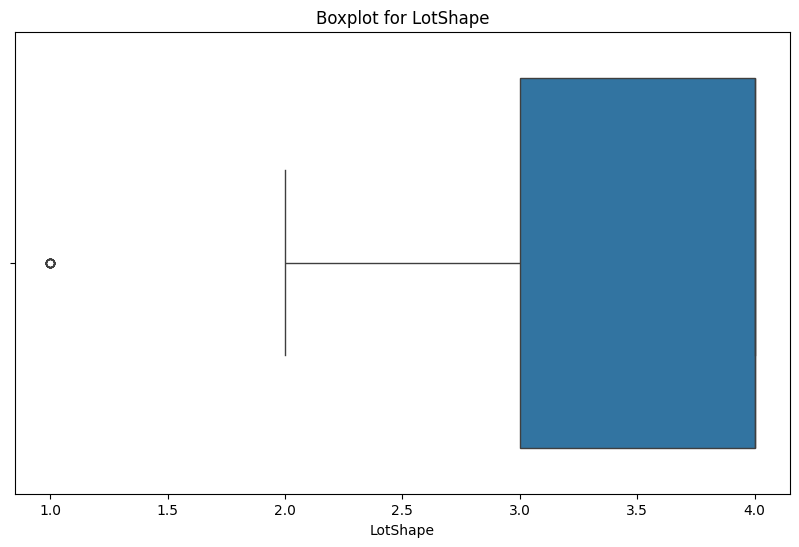

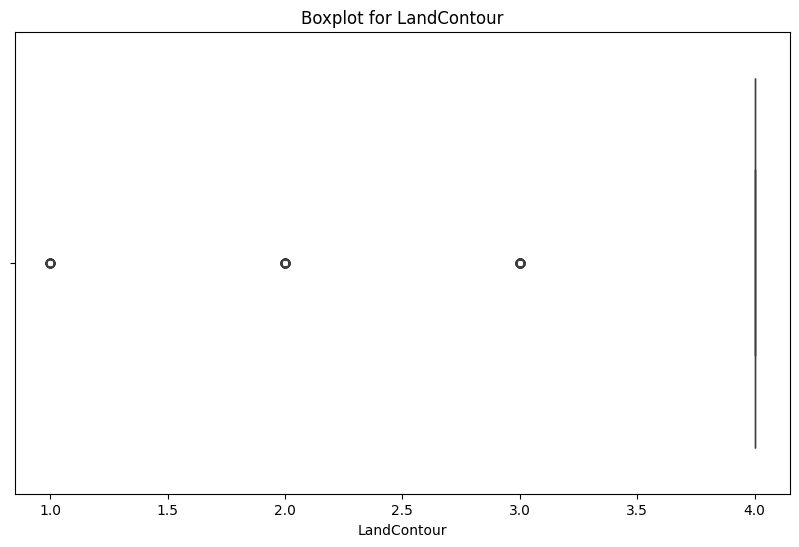

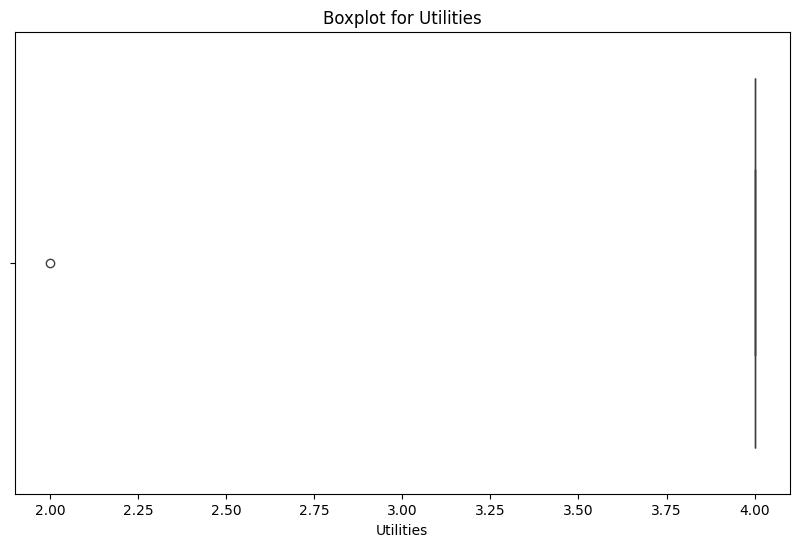

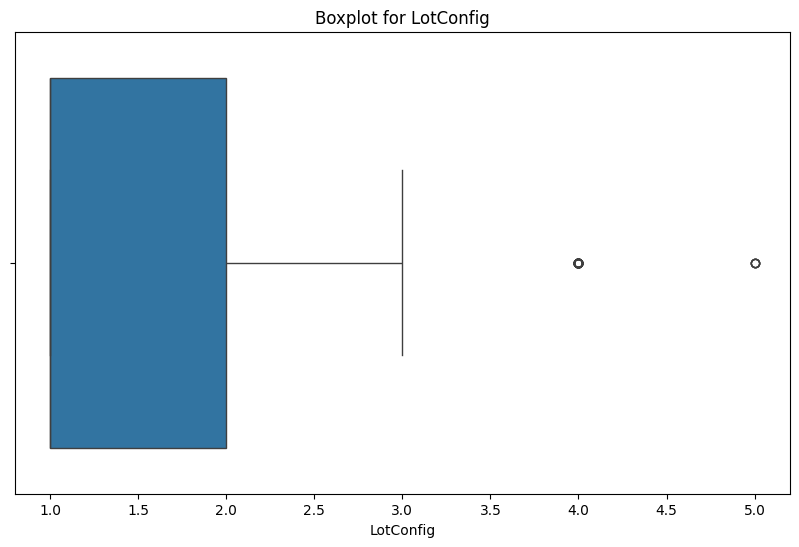

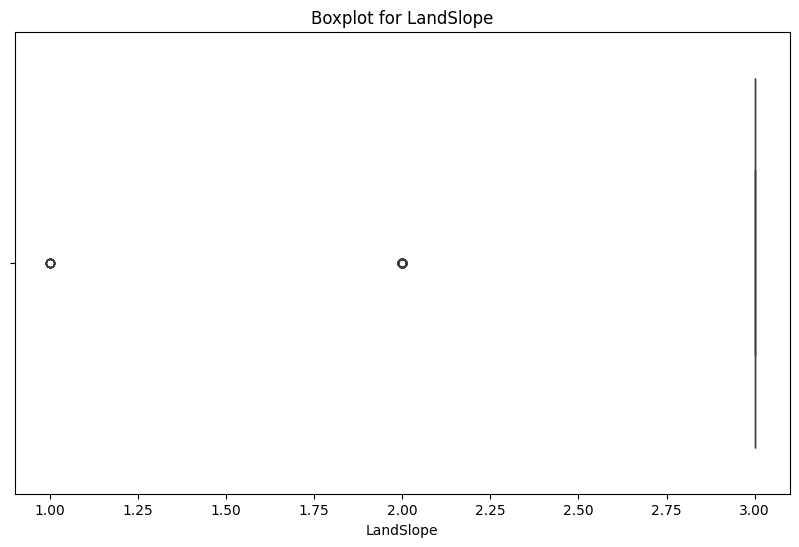

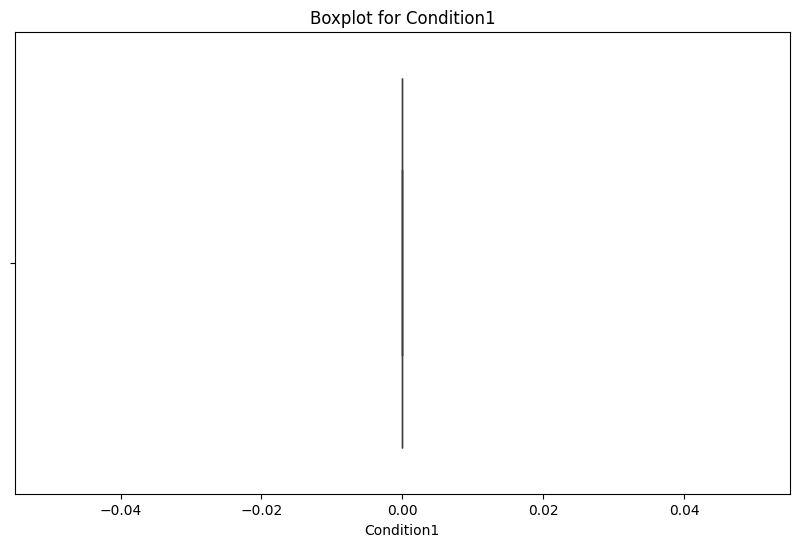

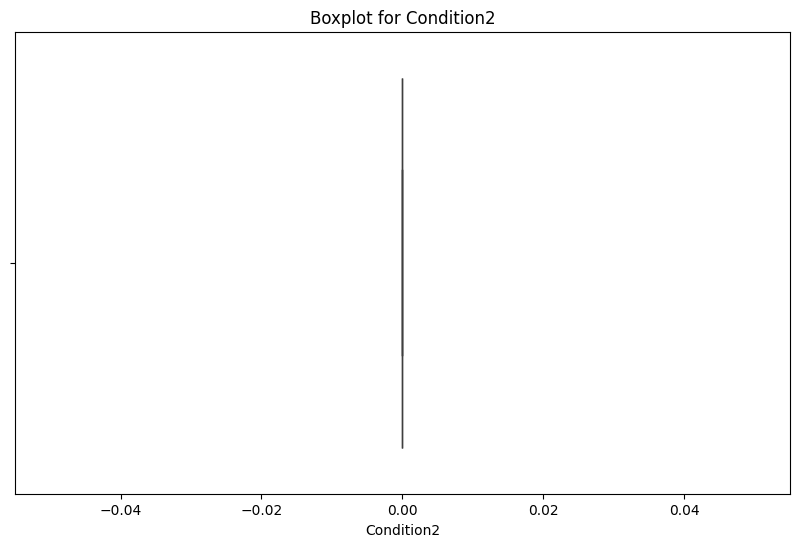

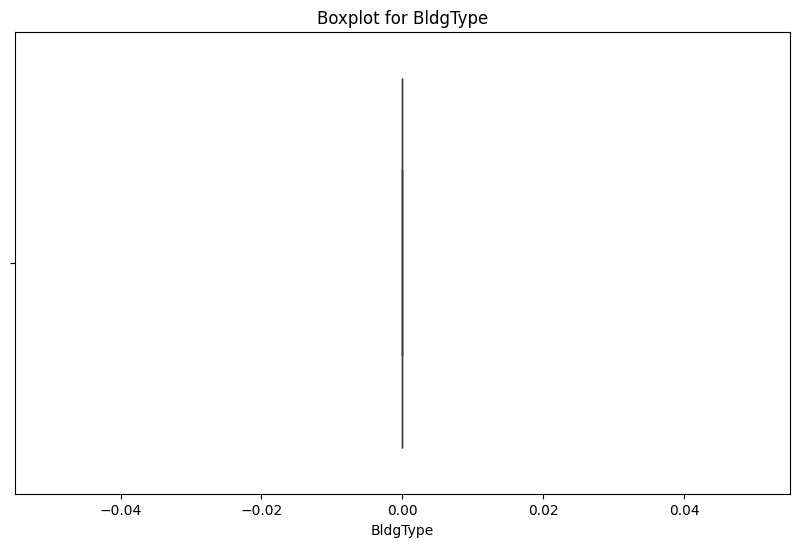

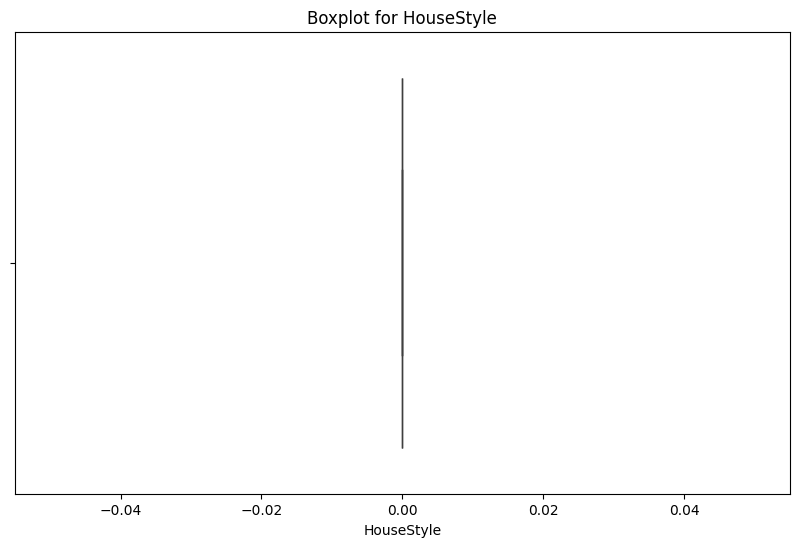

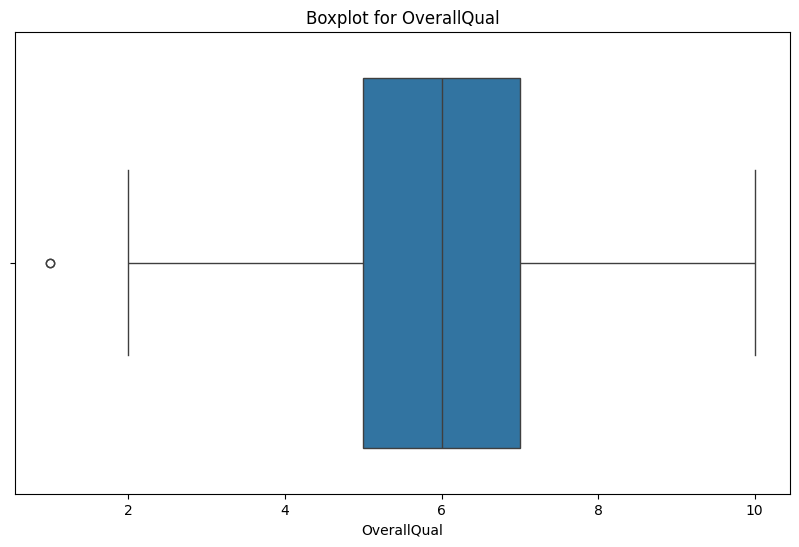

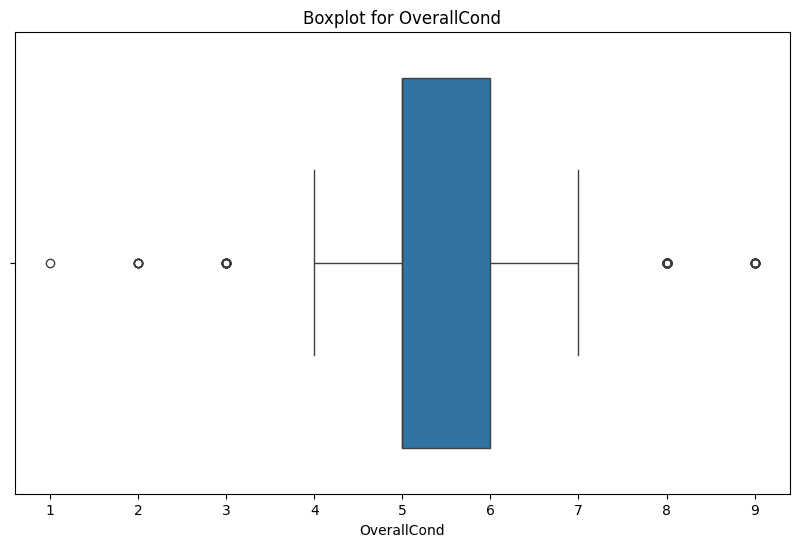

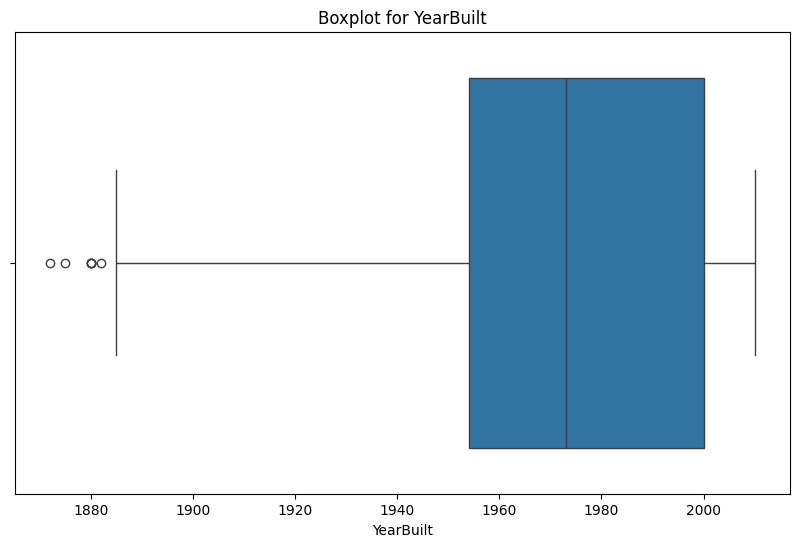

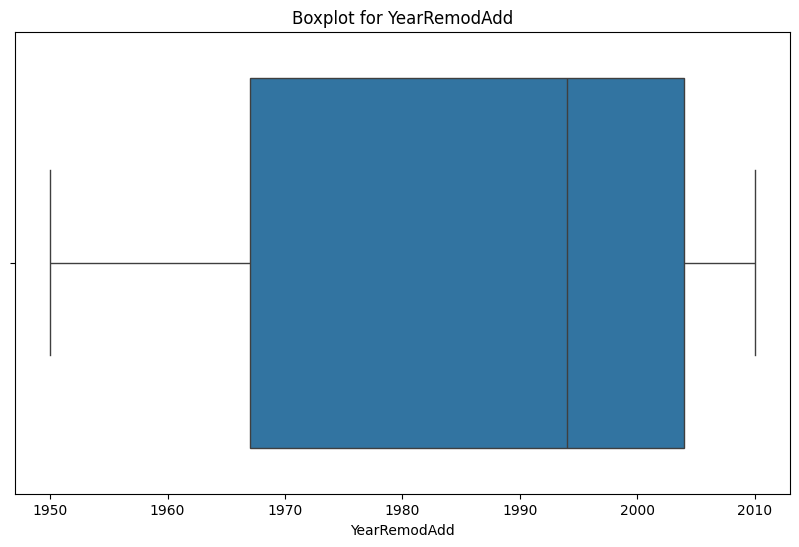

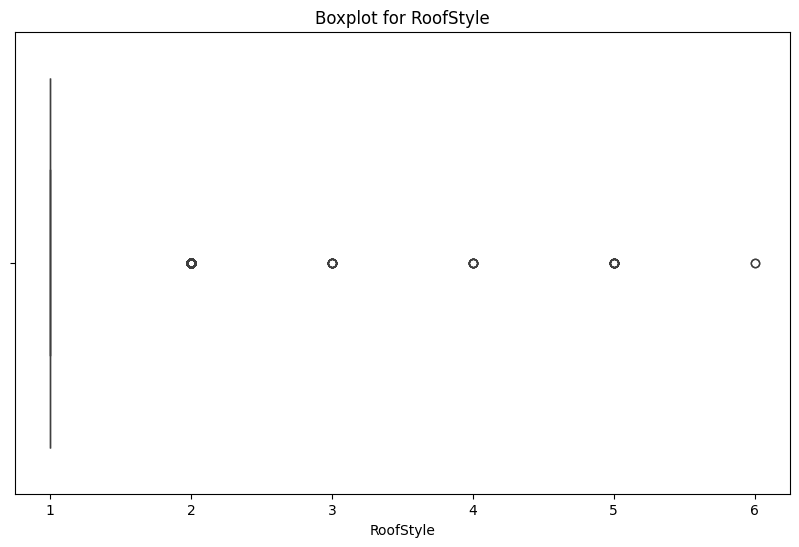

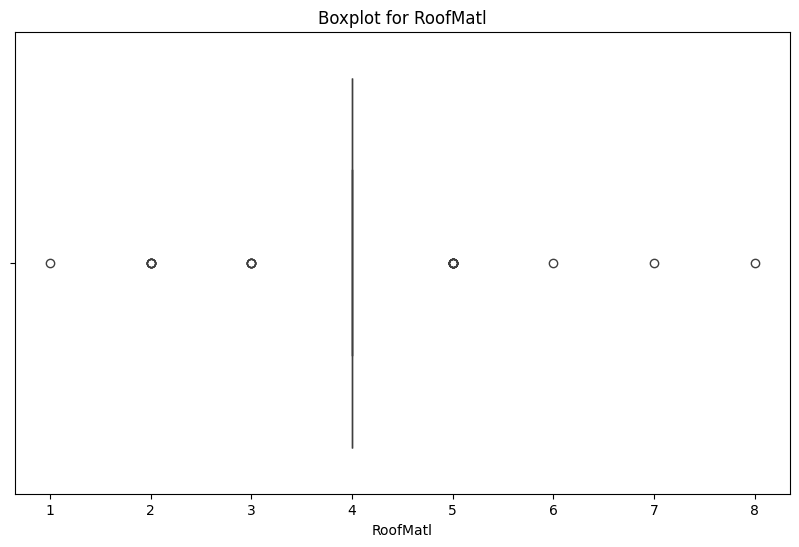

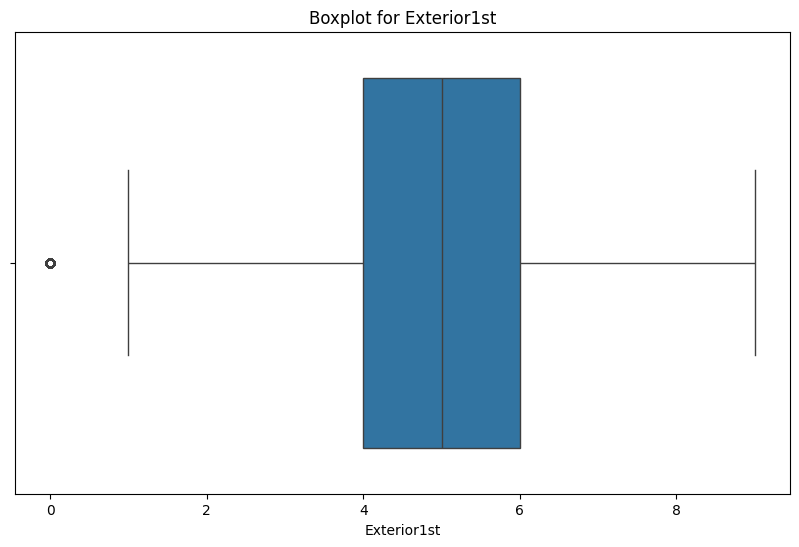

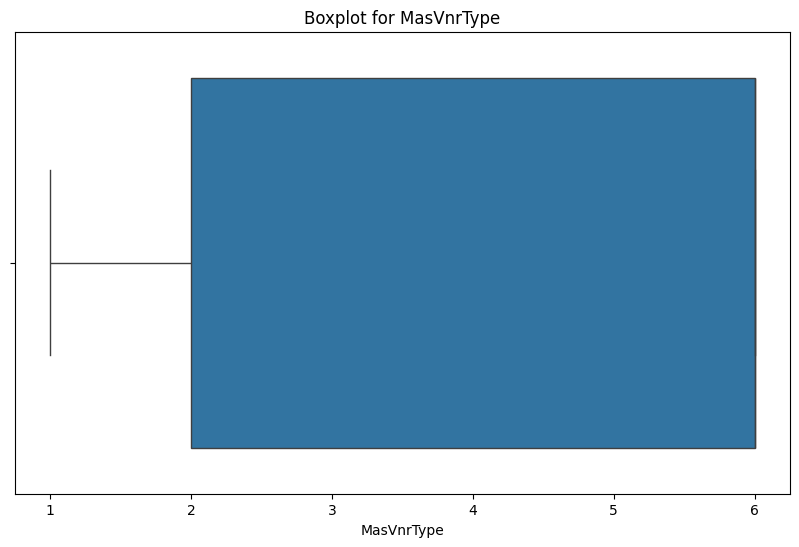

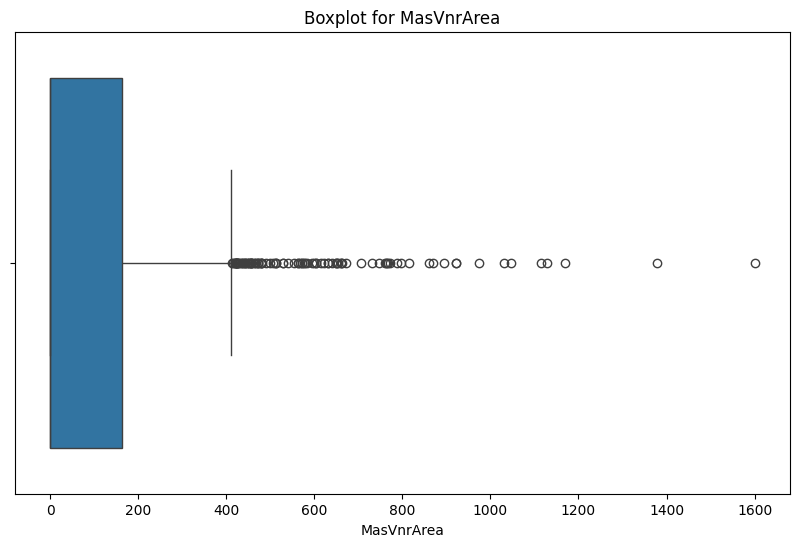

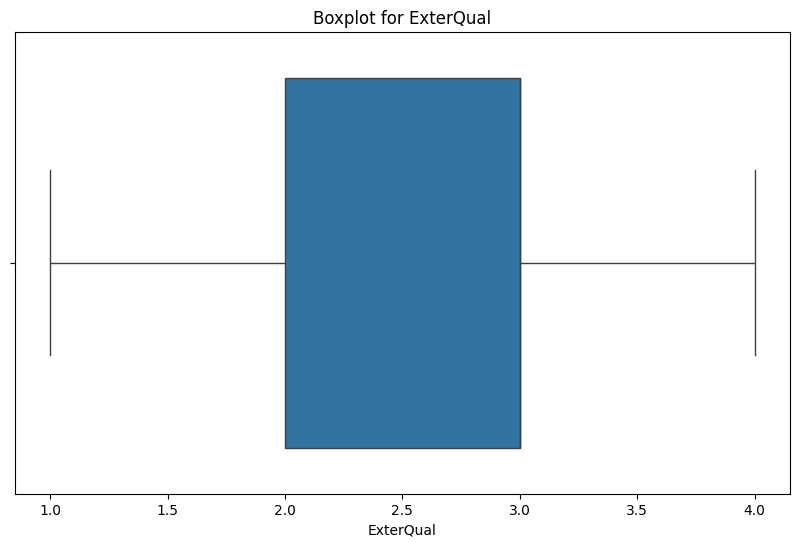

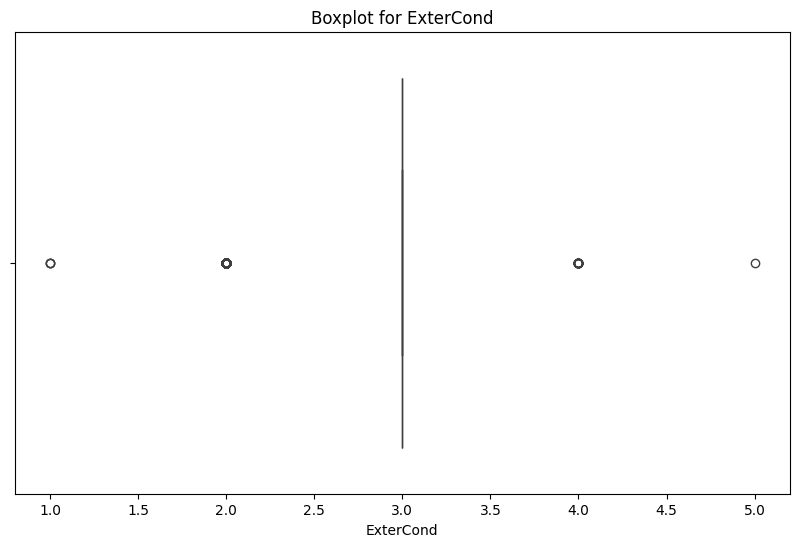

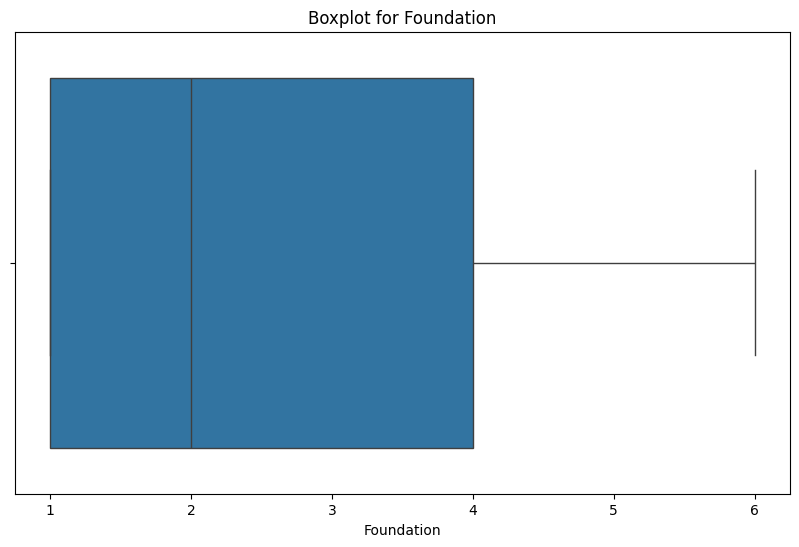

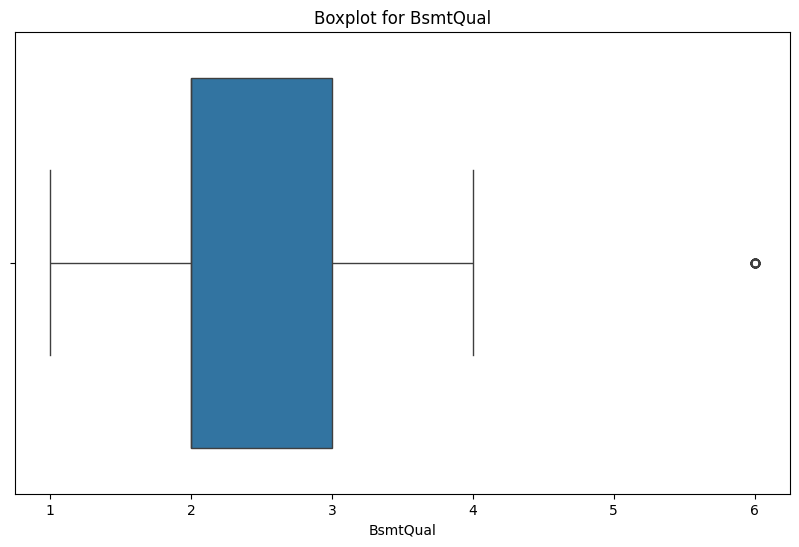

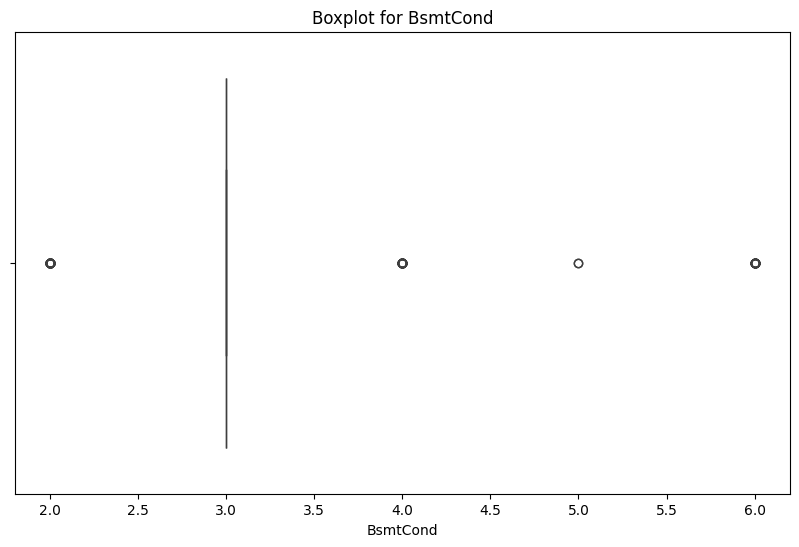

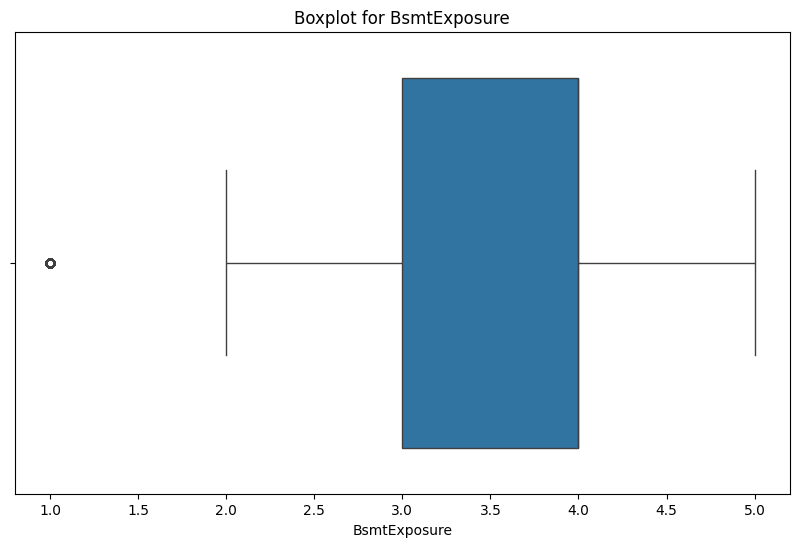

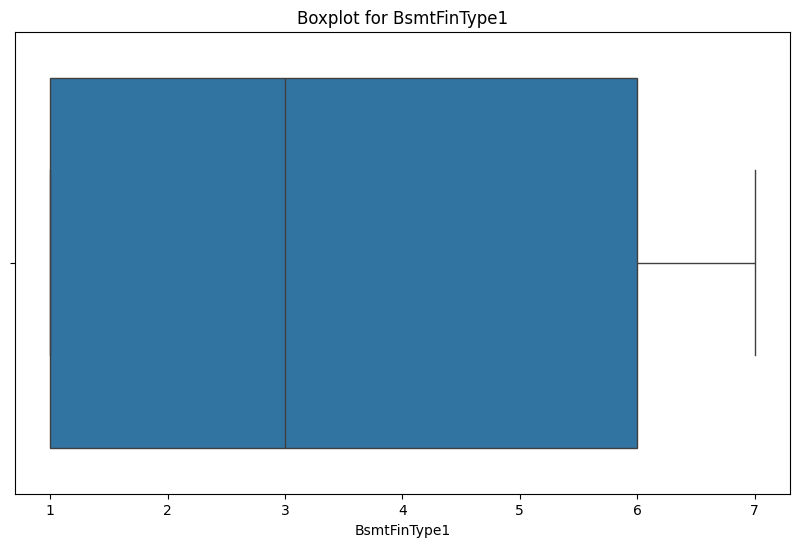

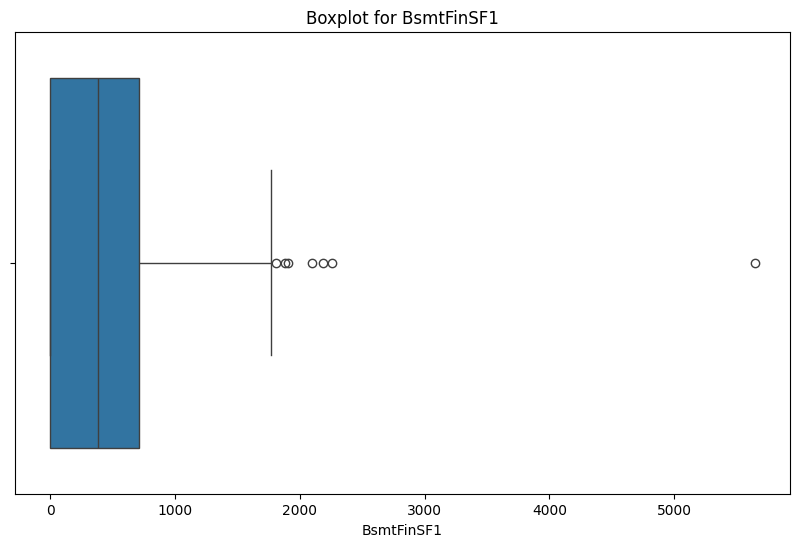

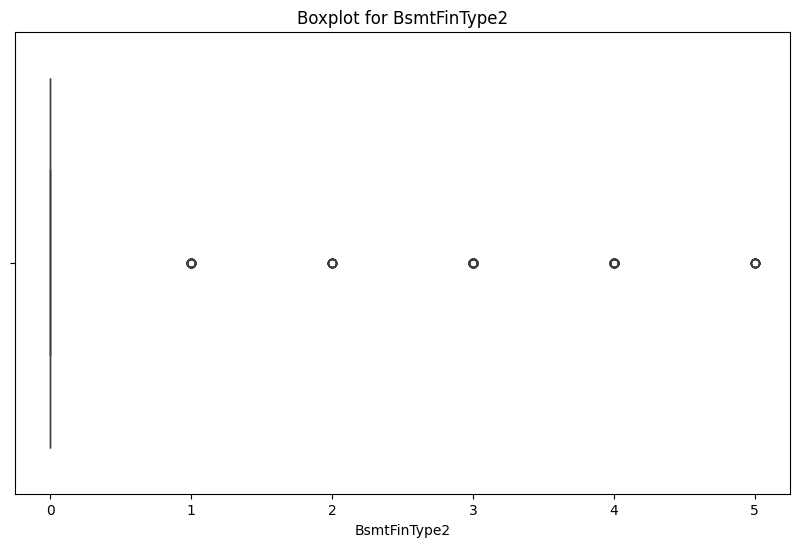

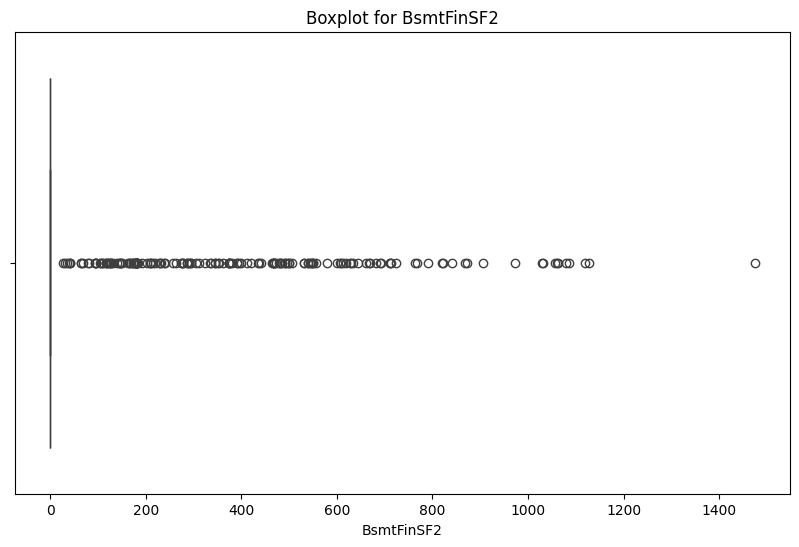

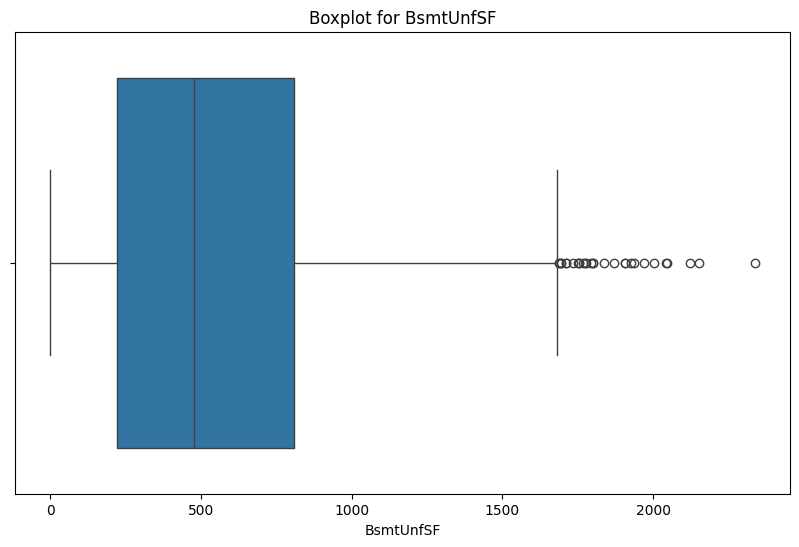

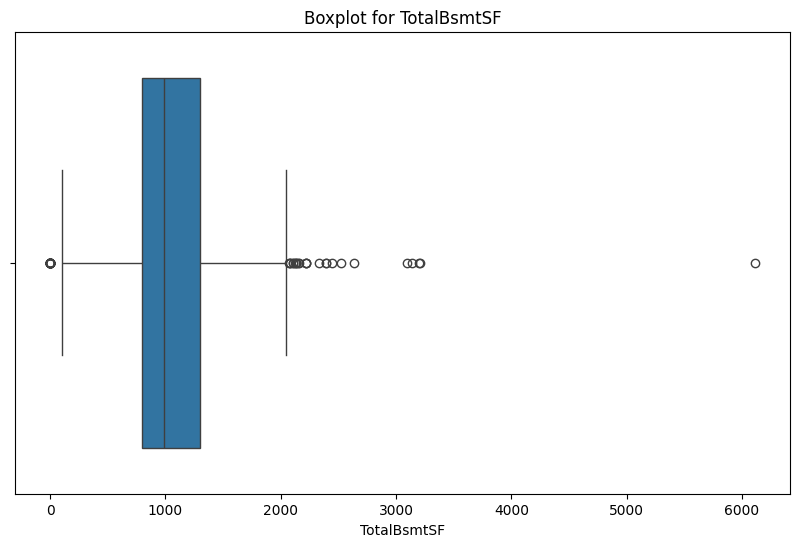

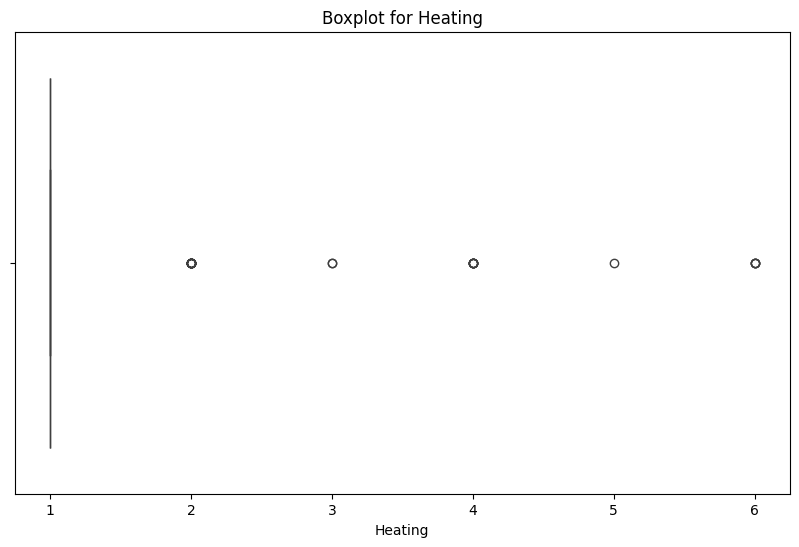

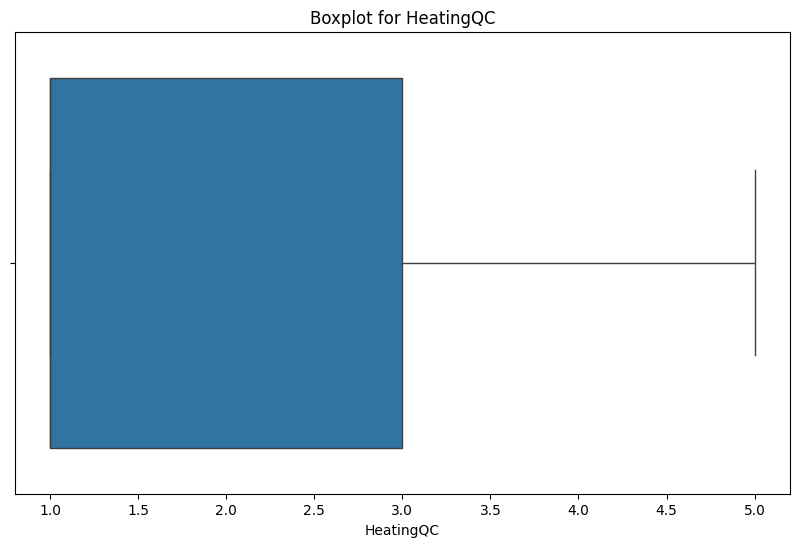

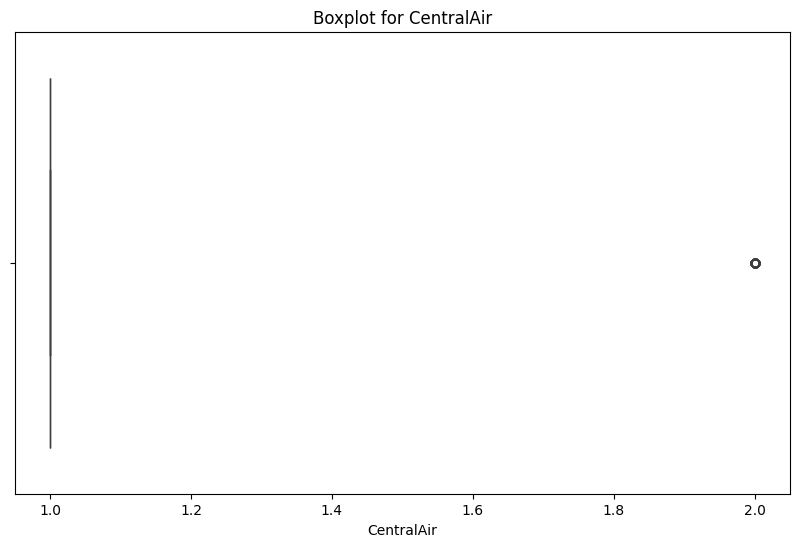

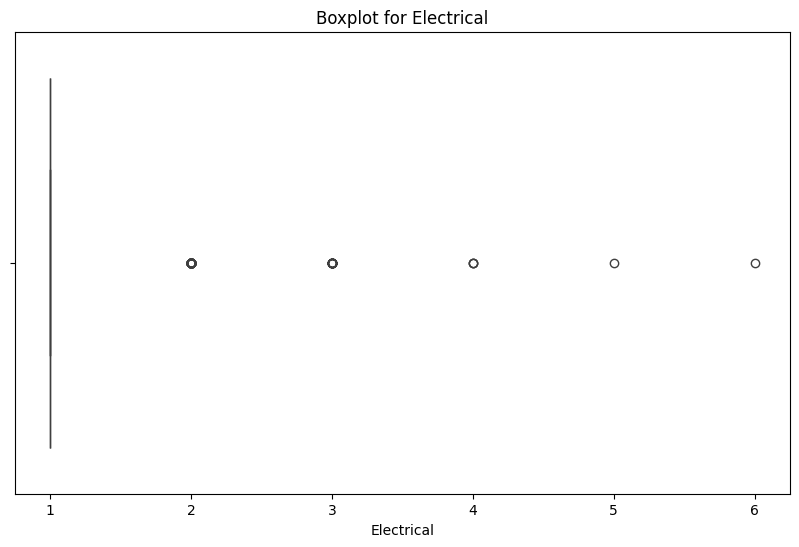

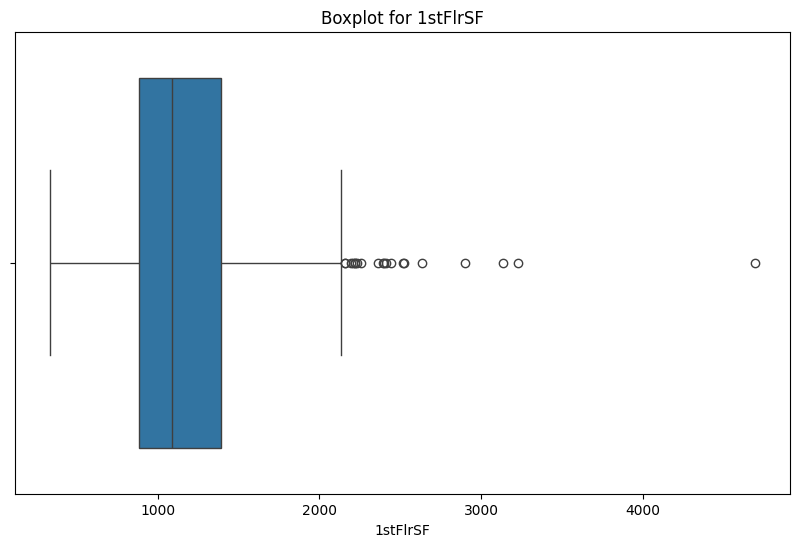

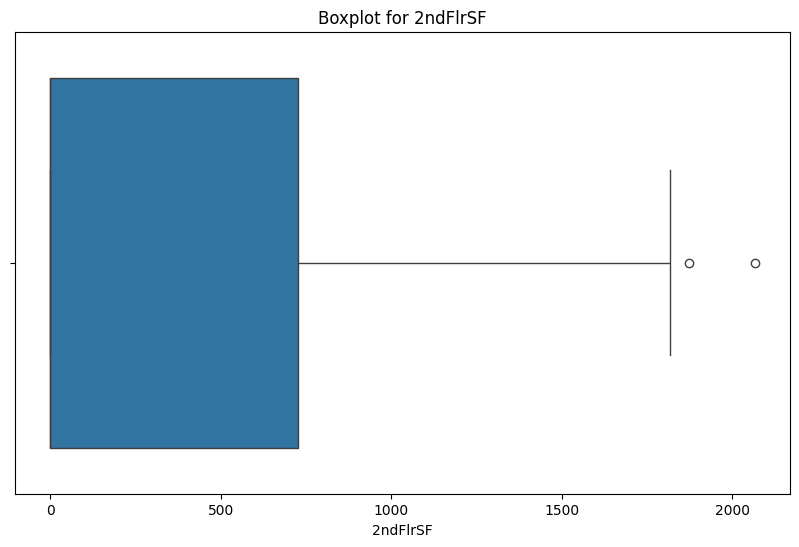

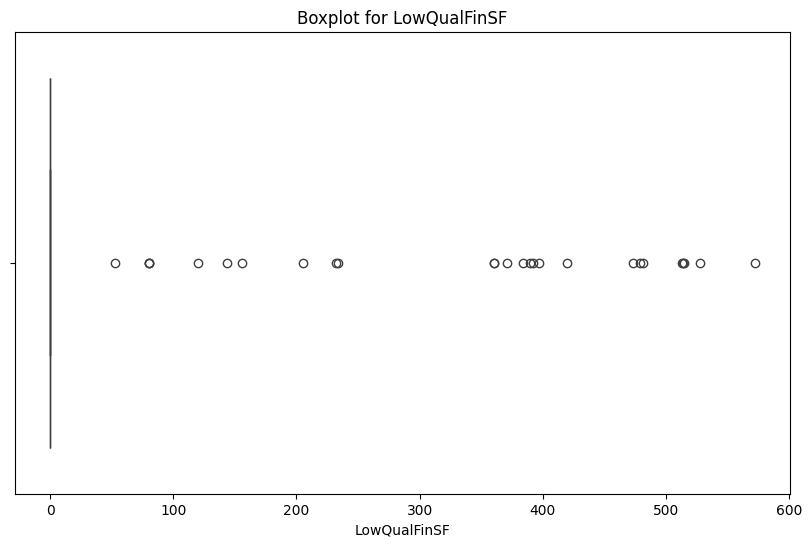

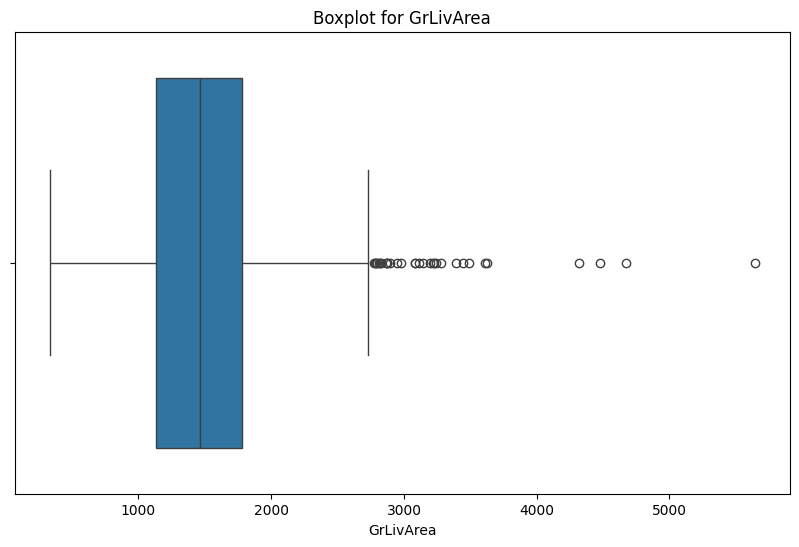

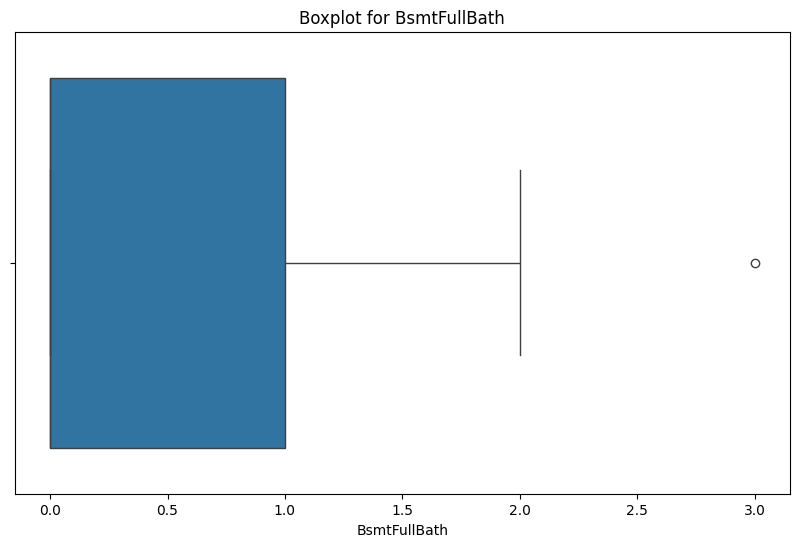

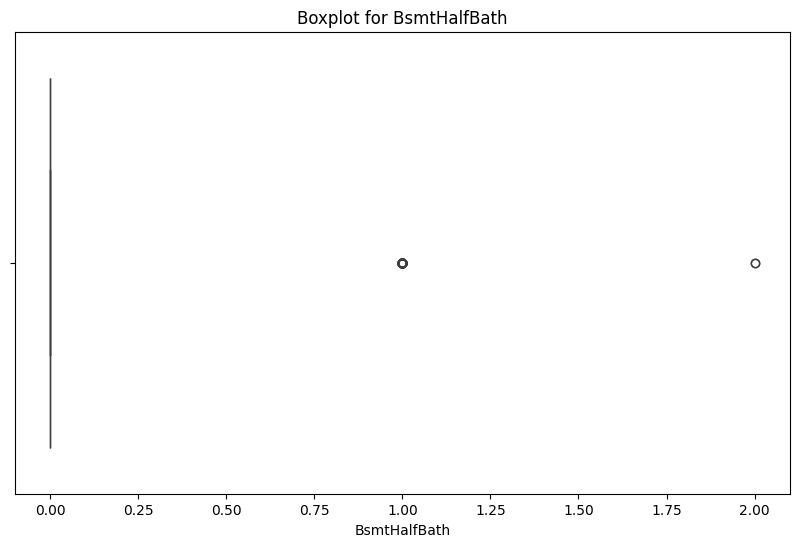

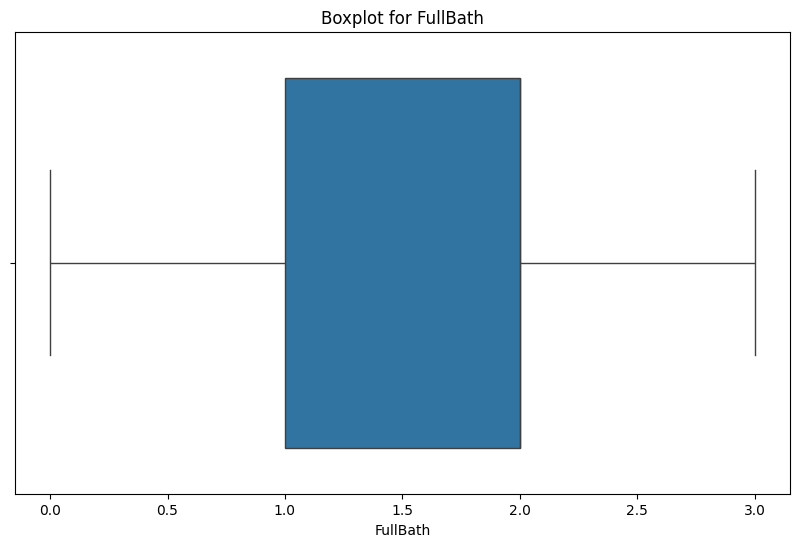

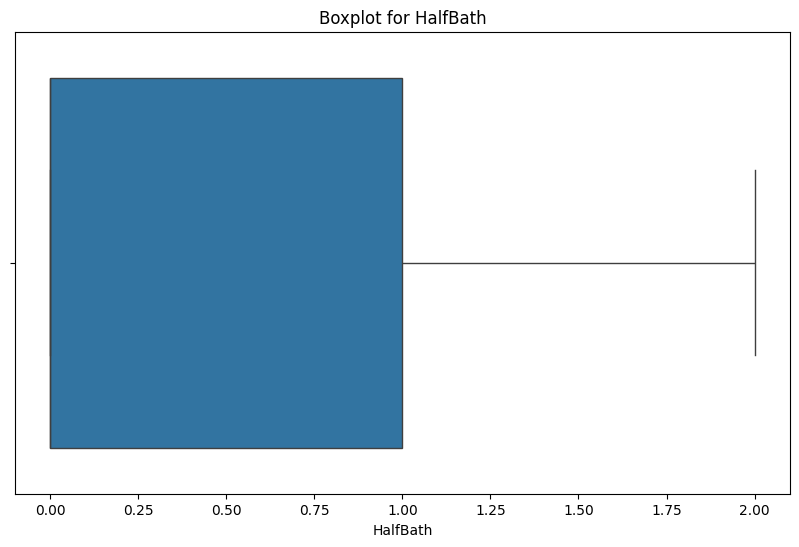

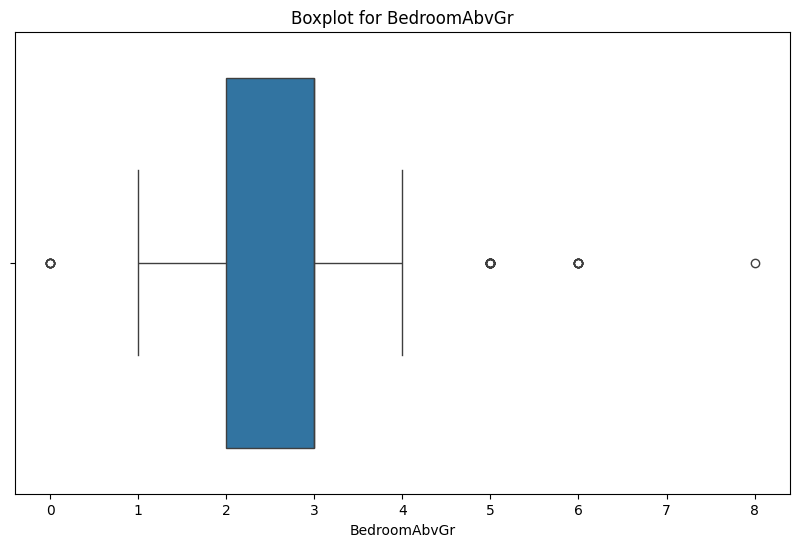

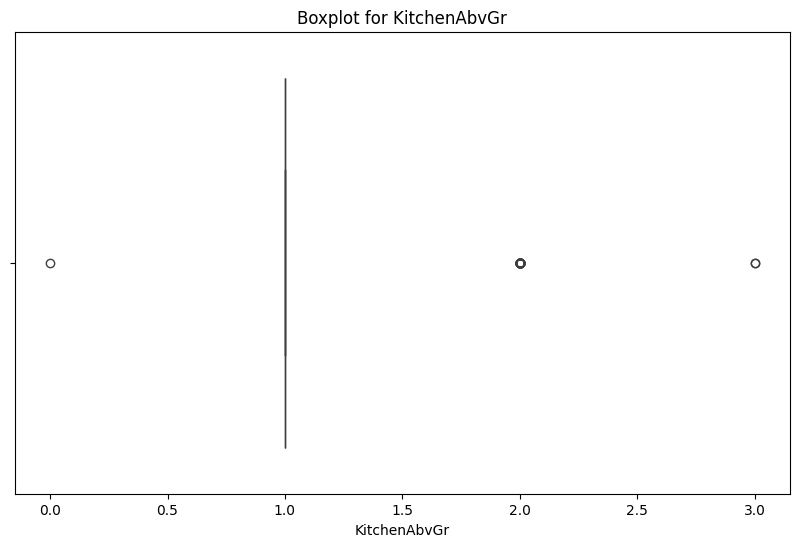

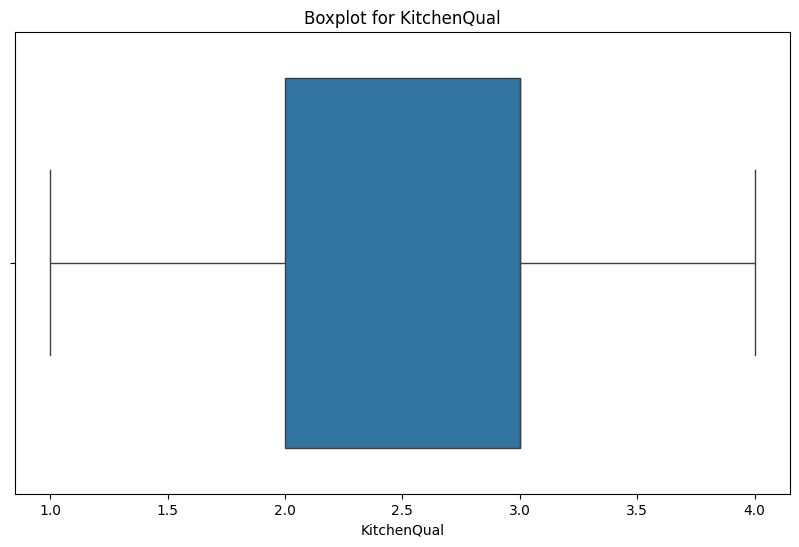

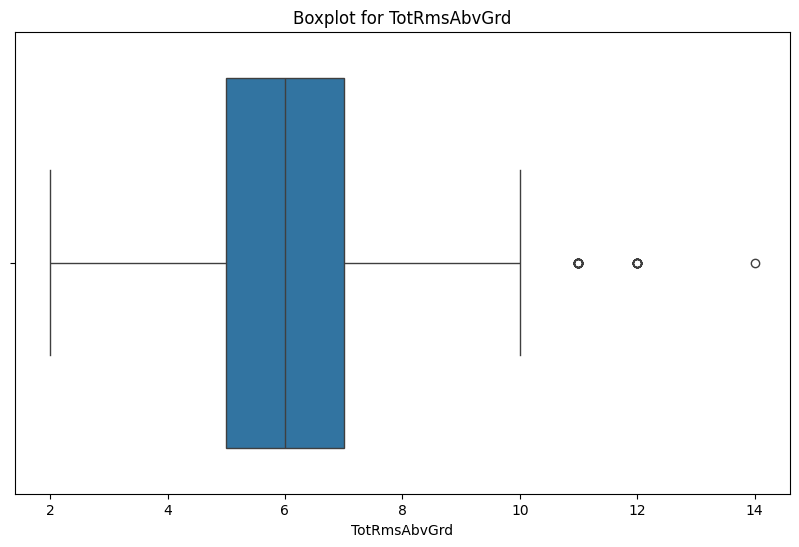

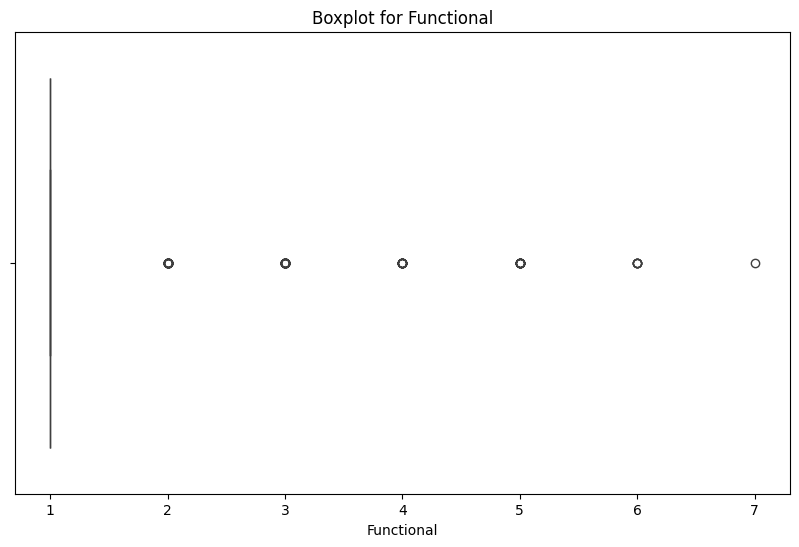

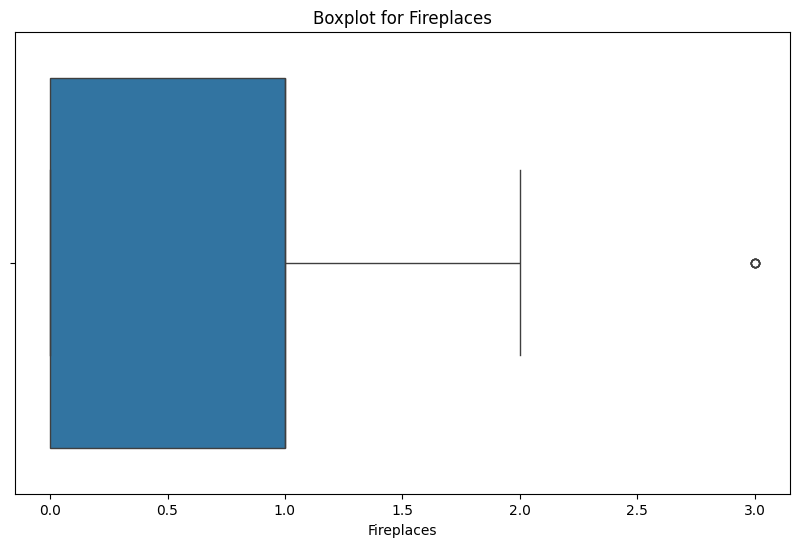

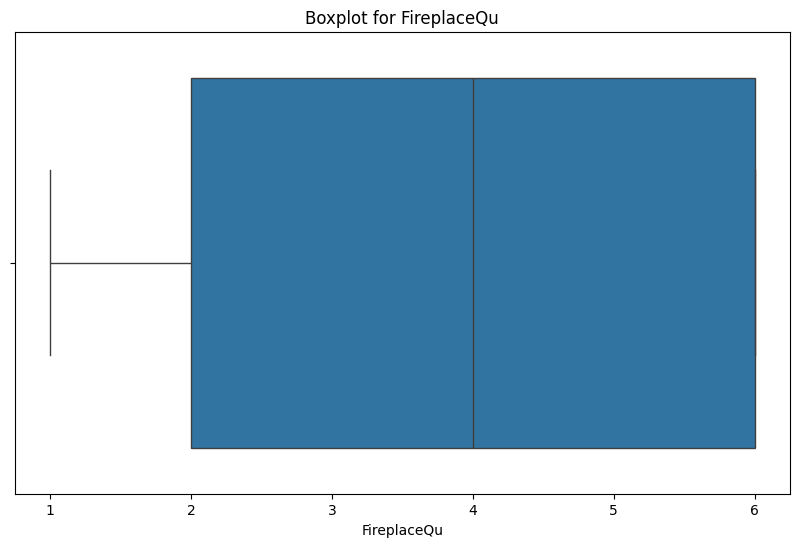

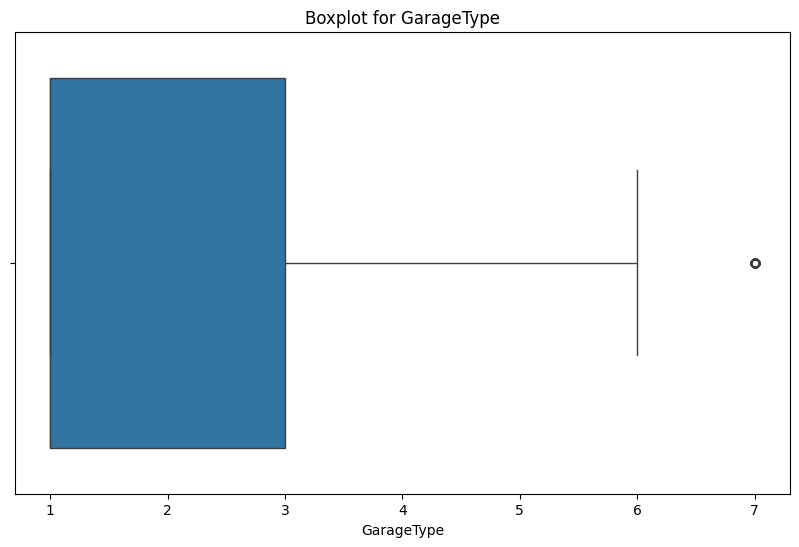

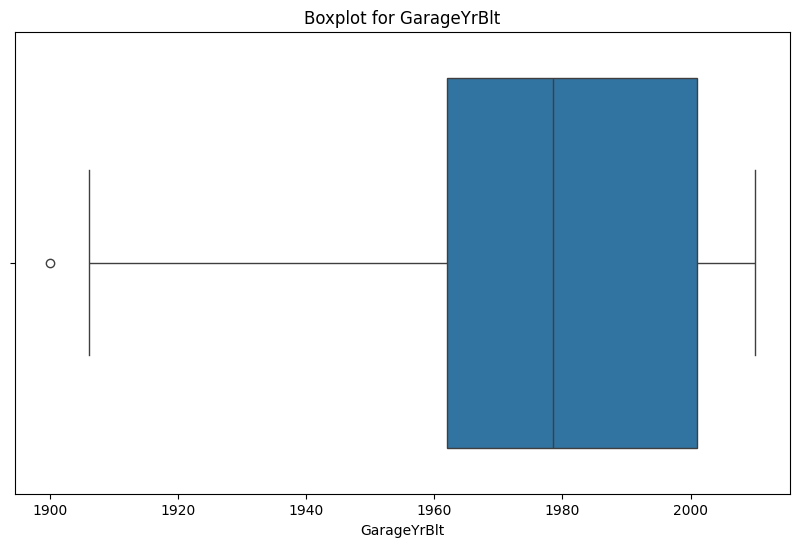

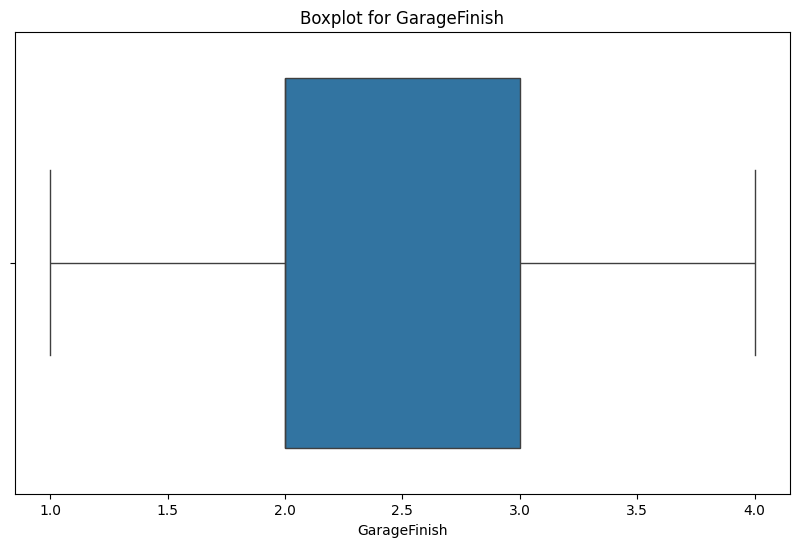

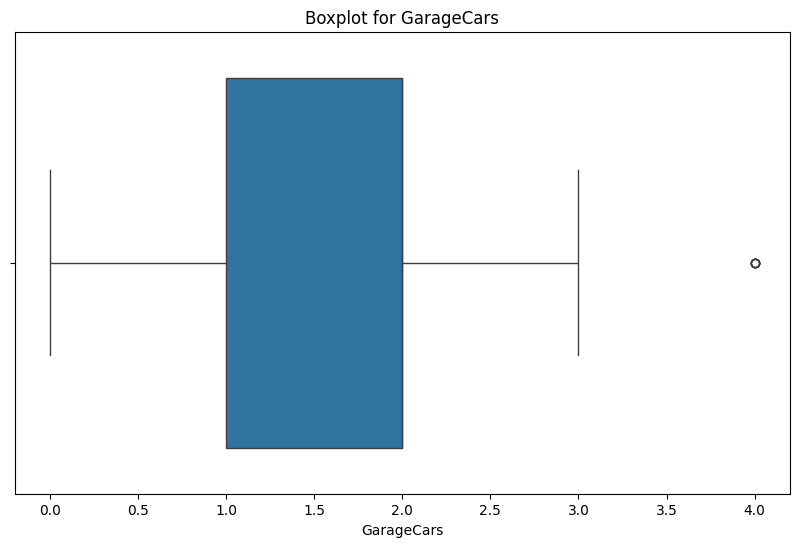

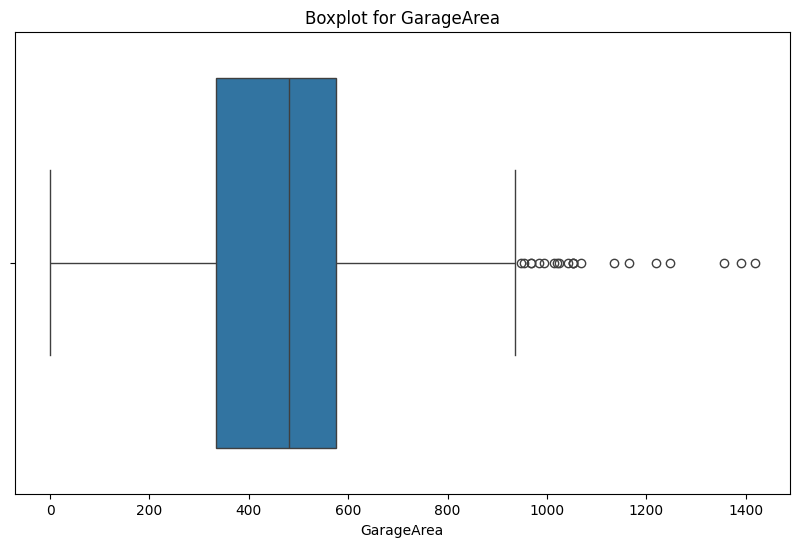

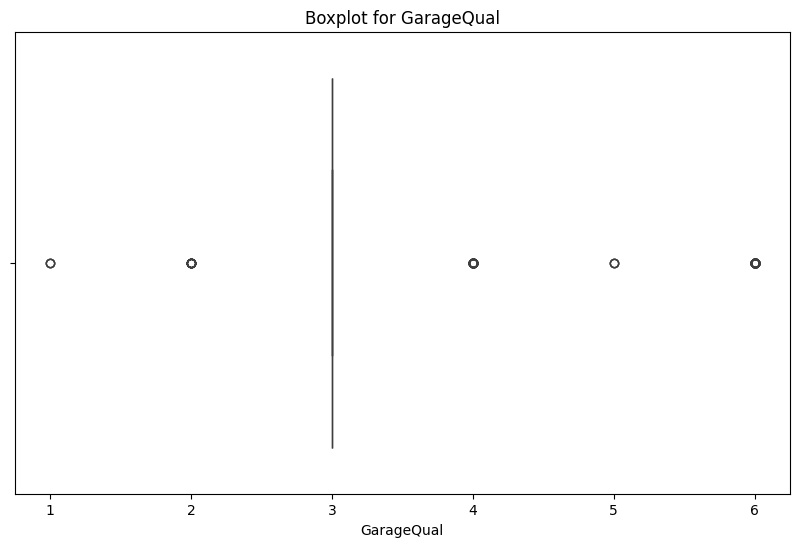

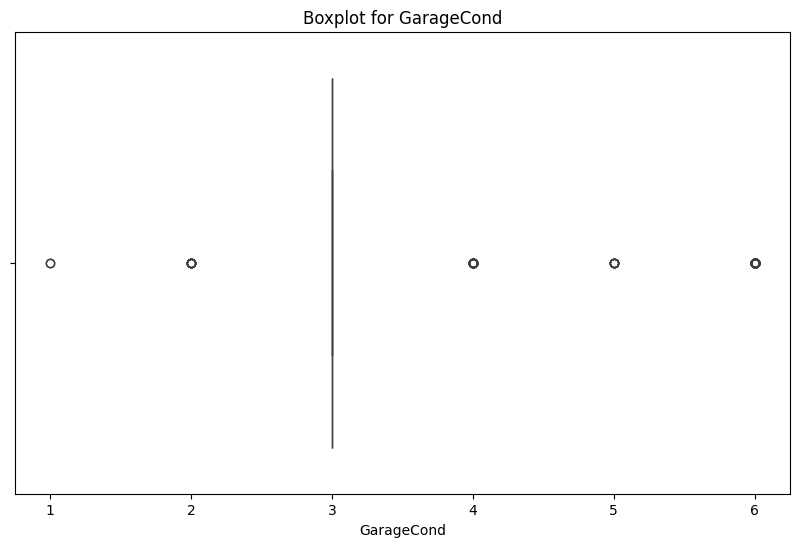

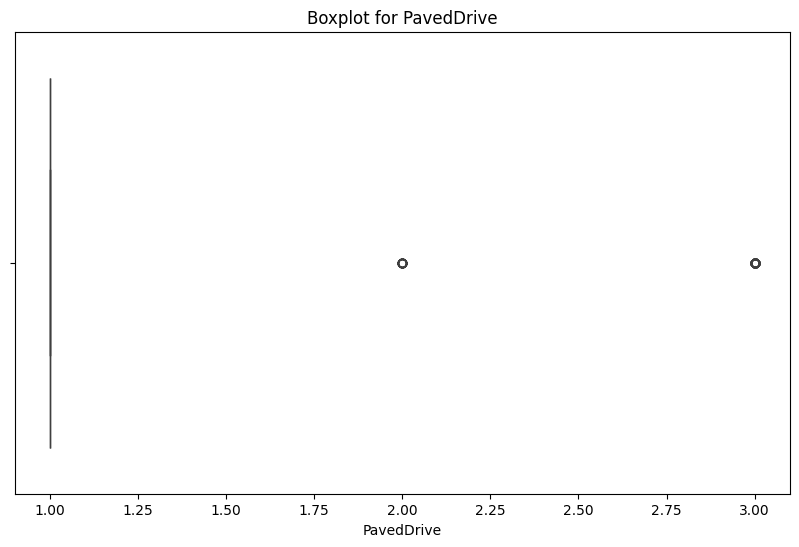

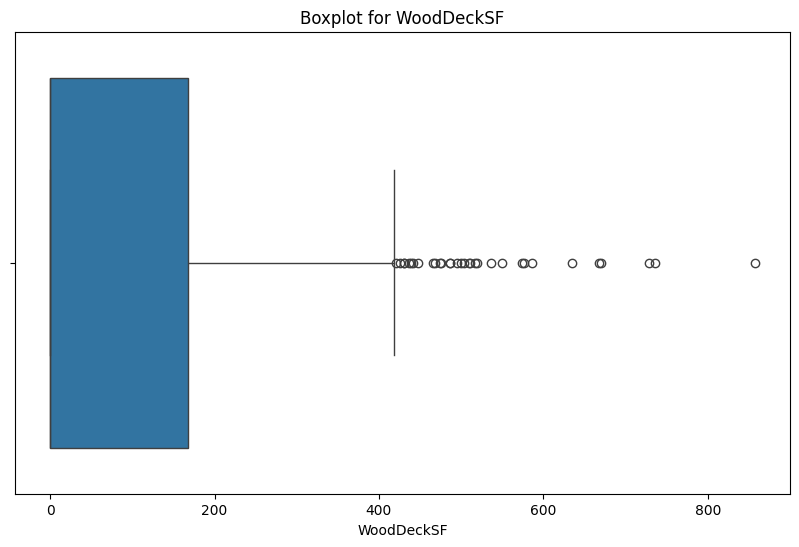

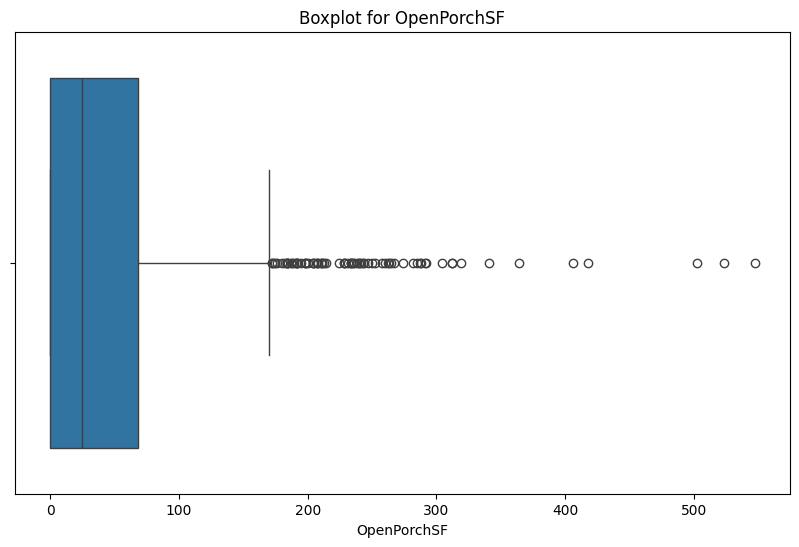

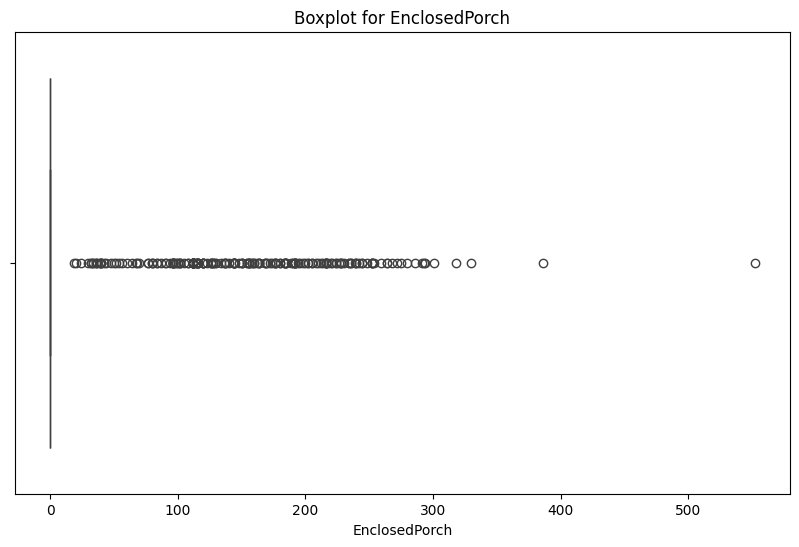

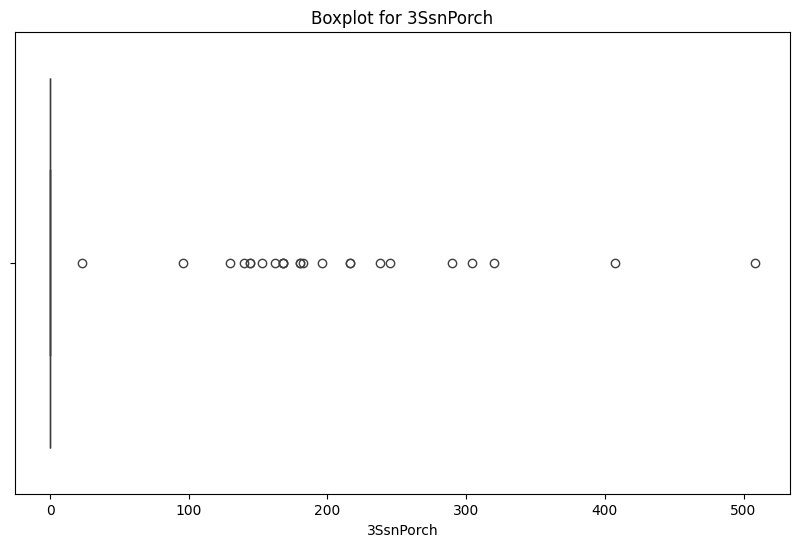

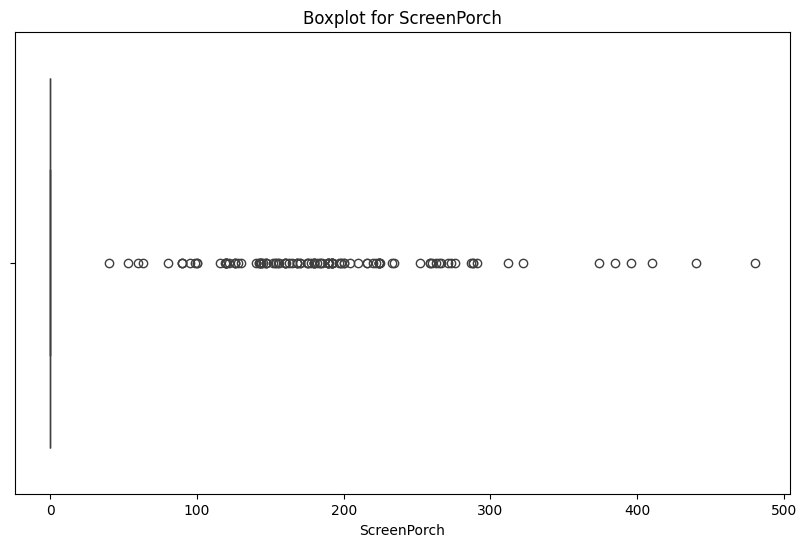

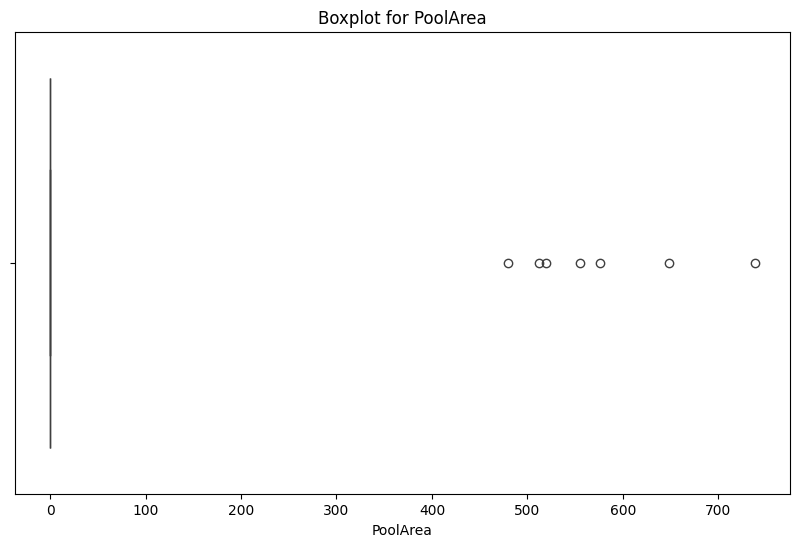

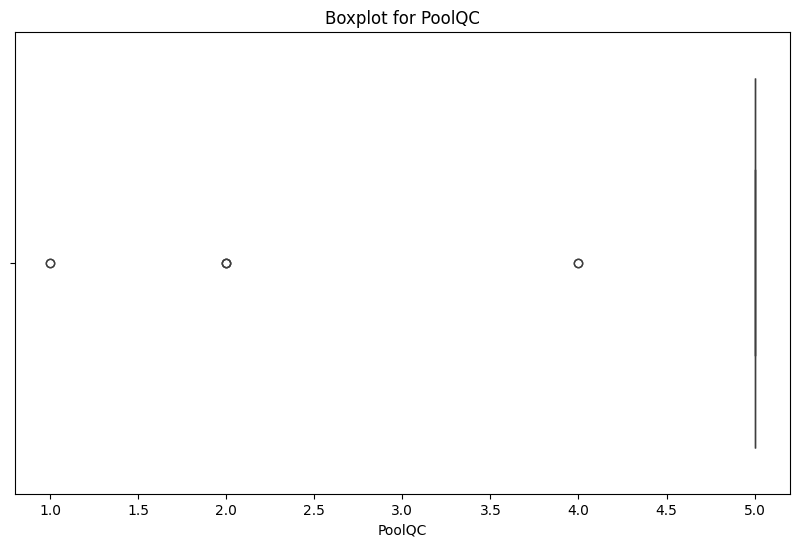

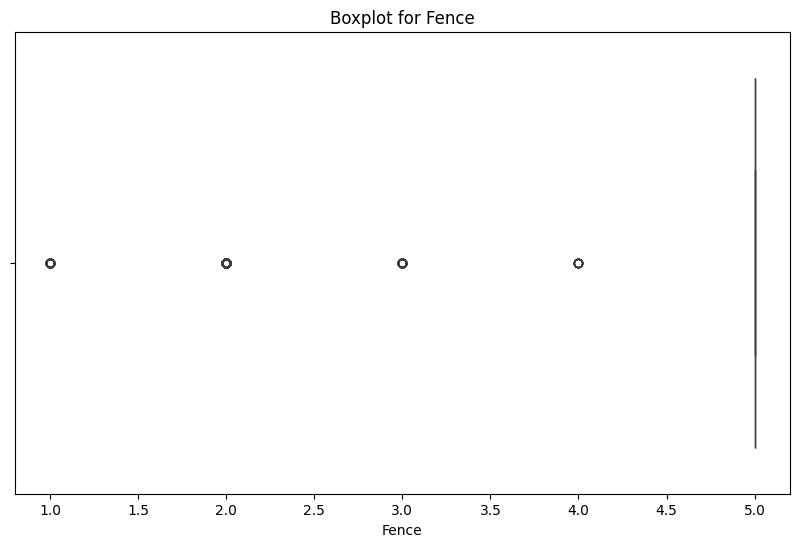

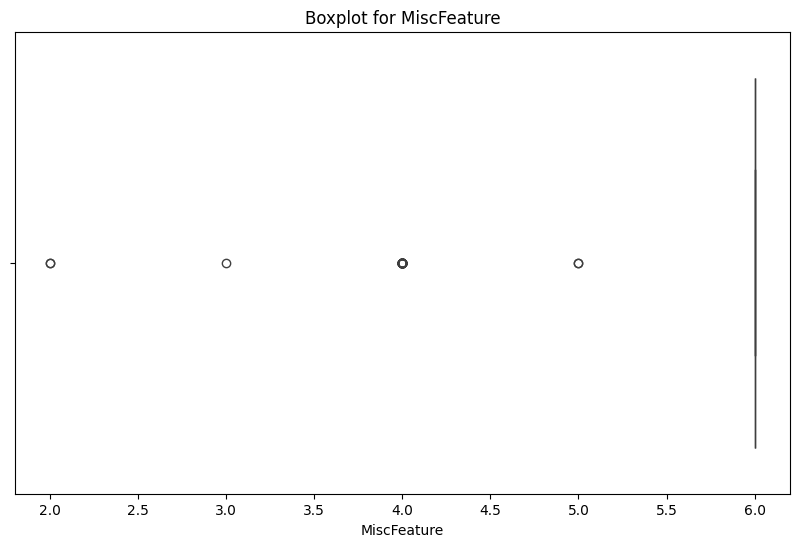

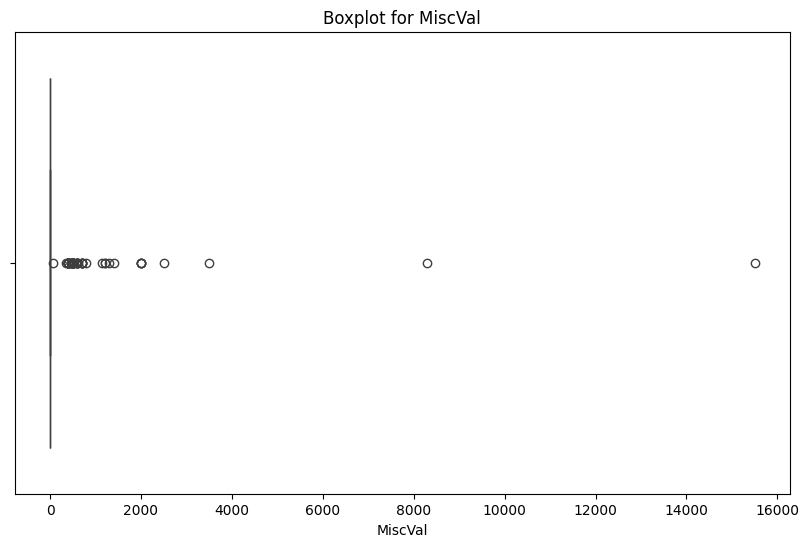

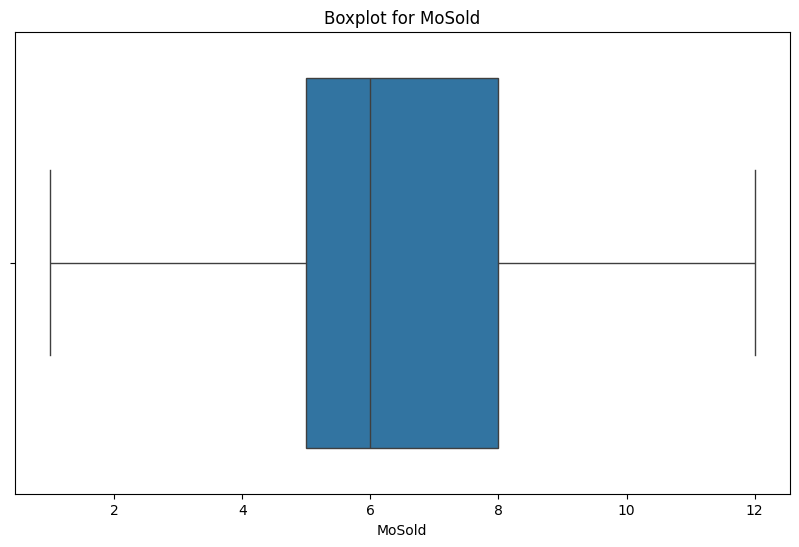

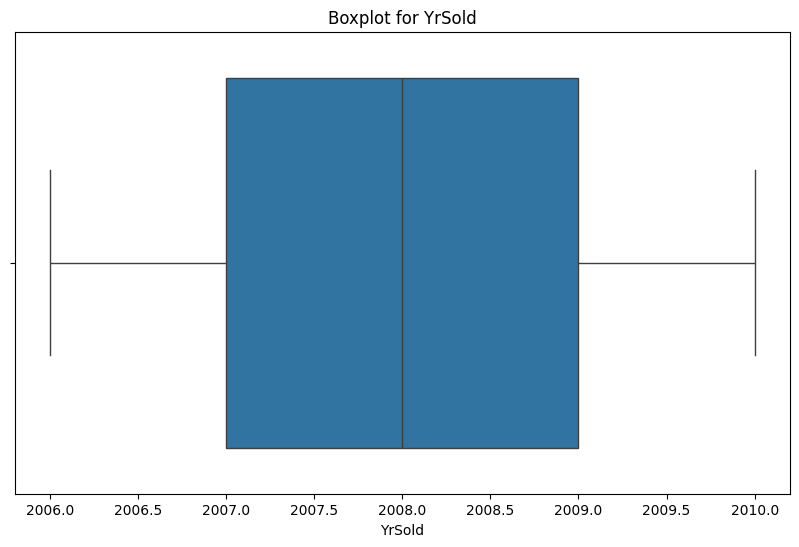

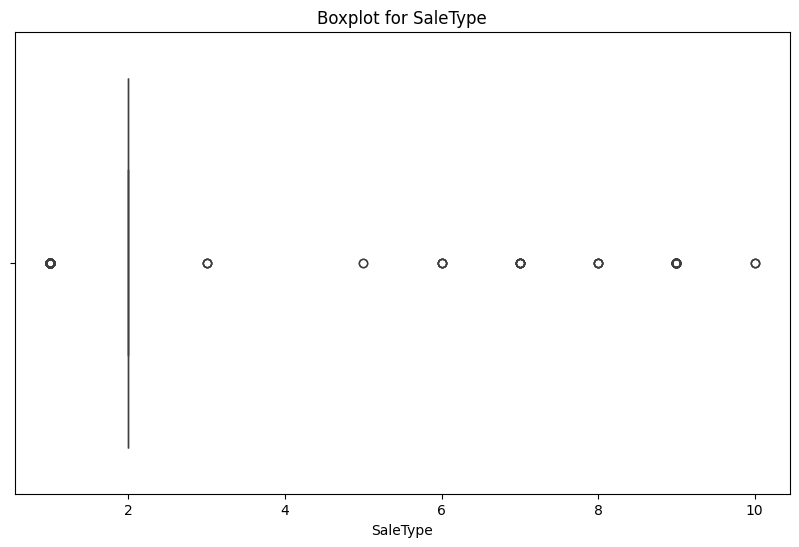

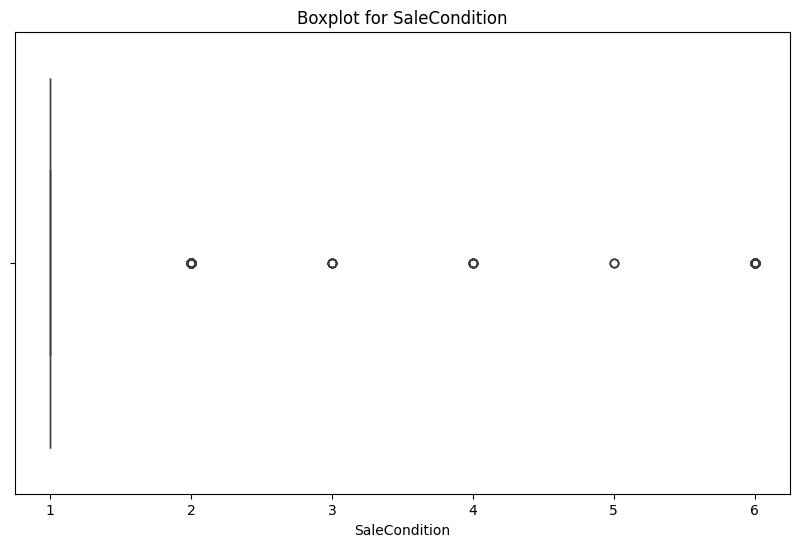

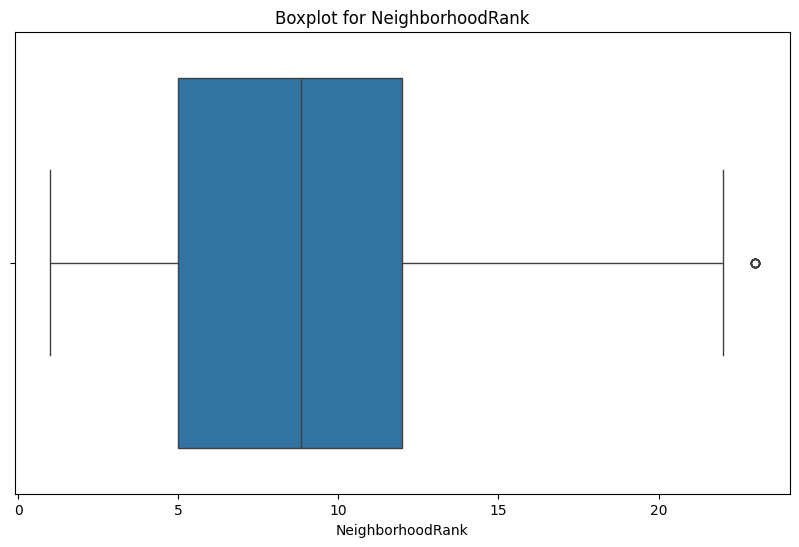

Outliers detected in MSSubClass:
[   9   48   93  125  165  246  291  300  312  335  411  488  520  535
  635  637  703  705  713  861  969  985 1030 1062 1144 1186 1190 1266
 1393 1416]

Outliers detected in MSZoning:
[  47   56   87  105  115  158  180  212  240  256  270  281  285  297
  317  377  381  399  409  412  453  460  501  507  525  549  578  603
  623  641  644  650  686  687  699  755  758  762  824  829  831  864
  875  885  914  959  973  975  977  989 1087 1089 1091 1172 1191 1217
 1246 1265 1317 1358 1364 1365 1374 1442 1454]

Outliers detected in LotFrontage:
[ 171  197  231  277  313  446  807  909  934 1107 1127 1173 1182 1211
 1298 1337]

Outliers detected in LotArea:
[  53  249  313  335  384  451  457  661  706  769  848 1298 1396]

Outliers detected in Street:
[  52  335  582  812 1061 1184]

Outliers detected in LotShape:
[ 264  301  313 1006 1107 1127 1260 1298 1348 1430]

Outliers detected in LandContour:
[  53  120  208  249  271  313  318  351  375  384  3

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# List of numeric columns to detect outliers (excluding 'SalePrice')
numeric_columns = data1.select_dtypes(include=[np.number]).columns.tolist()
numeric_columns.remove('SalePrice')

# Boxplot visualization for outlier detection
def visualize_outliers(data1, columns):
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=data1[column])
        plt.title(f'Boxplot for {column}')
        plt.show()

# Visualize outliers in data1
visualize_outliers(data1, numeric_columns)

# Detect outliers using Z-score
def detect_outliers(data1, columns, threshold=3):
    outlier_indices = {}
    for column in columns:
        z_scores = np.abs(stats.zscore(data1[column]))
        outliers = np.where(z_scores > threshold)[0]  # Indices where outliers occur
        outlier_indices[column] = outliers
        print(f"Outliers detected in {column}:")
        print(outliers)
        print()
    return outlier_indices

# Detect outliers for each column in data1 (Z-score > 3)
outliers_dict = detect_outliers(data1, numeric_columns)


# for the below diagrams if fig is not as box plot don't consider them as the outlier treat them as the values.
# apply log to get outlier data inside

In [37]:
# Let's define a function to remove outliers using the IQR method.
# Outliers are defined as points outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR].
# I will create a copy of the dataset and apply the IQR method to remove outliers (excluding 'SalePrice').

import pandas as pd

# Create a copy of the original dataset for outlier removal
df_cleaned = data1.copy()

# Select numeric columns excluding 'SalePrice'
numeric_columns = df_cleaned.select_dtypes(include='number').columns
numeric_columns = numeric_columns.drop('SalePrice')

# Function to remove outliers using IQR
def remove_outliers_iqr(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply the function to remove outliers on numeric columns
df_cleaned = remove_outliers_iqr(df_cleaned, numeric_columns)

# Display the shape of the cleaned dataset to verify the changes
df_cleaned.shape


(74, 79)

In [38]:
data1.shape

(1460, 79)

In [39]:
# Function to check for outliers in df_cleaned using IQR method

def detect_outliers_iqr(df):
    outliers = {}
    for column in df.select_dtypes(include=['number']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Check for outliers
        outlier_rows = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outliers[column] = len(outlier_rows)
    
    return outliers

# Detect outliers in df_cleaned
outliers_after_cleaning = detect_outliers_iqr(df_cleaned)
outliers_after_cleaning


{'MSSubClass': 0,
 'MSZoning': 0,
 'LotFrontage': 4,
 'LotArea': 2,
 'Street': 0,
 'LotShape': 0,
 'LandContour': 0,
 'Utilities': 0,
 'LotConfig': 13,
 'LandSlope': 0,
 'Condition1': 0,
 'Condition2': 0,
 'BldgType': 0,
 'HouseStyle': 0,
 'OverallQual': 1,
 'OverallCond': 5,
 'YearBuilt': 5,
 'YearRemodAdd': 4,
 'RoofStyle': 0,
 'RoofMatl': 0,
 'Exterior1st': 12,
 'MasVnrType': 0,
 'MasVnrArea': 2,
 'ExterQual': 0,
 'ExterCond': 0,
 'Foundation': 4,
 'BsmtQual': 6,
 'BsmtCond': 0,
 'BsmtExposure': 0,
 'BsmtFinType1': 0,
 'BsmtFinSF1': 0,
 'BsmtFinType2': 0,
 'BsmtFinSF2': 0,
 'BsmtUnfSF': 0,
 'TotalBsmtSF': 0,
 'Heating': 0,
 'HeatingQC': 13,
 'CentralAir': 0,
 'Electrical': 0,
 '1stFlrSF': 0,
 '2ndFlrSF': 0,
 'LowQualFinSF': 0,
 'GrLivArea': 4,
 'BsmtFullBath': 0,
 'BsmtHalfBath': 0,
 'FullBath': 3,
 'HalfBath': 0,
 'BedroomAbvGr': 0,
 'KitchenAbvGr': 0,
 'KitchenQual': 14,
 'TotRmsAbvGrd': 0,
 'Functional': 0,
 'Fireplaces': 0,
 'FireplaceQu': 0,
 'GarageType': 0,
 'GarageYrBlt': 5,

In [40]:
# Create a copy of the data1, excluding 'SalesPrice'
data_boxcox = data1.copy()
data_boxcox = data_boxcox.drop(columns=['SalePrice'])
from scipy import stats

# Apply Box-Cox transformation for numeric columns (excluding negative values)
for col in data_boxcox.select_dtypes(include=['float64', 'int64']).columns:
    # Checking if column has positive values before applying Box-Cox
    if (data_boxcox[col] > 0).all():
        data_boxcox[col], _ = stats.boxcox(data_boxcox[col] + 1e-9)  # Adding a small value to avoid log(0)


c:\Users\user\Python39\lib\site-packages\scipy\stats\_morestats.py:1120: UserWarning: The optimal lambda is 2106.3350579948433, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in float64.
  lmax = boxcox_normmax(x, method='mle', optimizer=optimizer)


In [41]:
def detect_outliers_iqr(data):
    # Select only numeric columns to calculate IQR
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier detection thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
    return outliers


In [42]:
# Check for outliers in the Box-Cox transformed data
outliers_boxcox = detect_outliers_iqr(data_boxcox)
print("Outliers after Box-Cox transformation:")
print(outliers_boxcox)


Outliers after Box-Cox transformation:
MSSubClass            0
MSZoning            309
LotFrontage         124
LotArea             131
Street                6
                   ... 
MoSold               58
YrSold                0
SaleType            193
SaleCondition       262
NeighborhoodRank      0
Length: 77, dtype: int64


In [43]:
def detect_outliers_iqr(data):
    # Select only numeric columns (SalesPrice is dropped if it exists)
    numeric_data = data.select_dtypes(include=['float64', 'int64'])
    
    # Drop 'SalesPrice' if it exists in the dataset
    if 'SalesPrice' in numeric_data.columns:
        numeric_data = numeric_data.drop(columns=['SalesPrice'])

    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = numeric_data.quantile(0.25)
    Q3 = numeric_data.quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier detection thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound)).sum()
    return outliers


In [44]:
# Detect outliers in the original data1
outliers_data1 = detect_outliers_iqr(data1)

# Detect outliers in the IQR-cleaned data
outliers_df_cleaned = detect_outliers_iqr(df_cleaned)

# Detect outliers in the Box-Cox transformed data
outliers_data_boxcox = detect_outliers_iqr(data_boxcox)


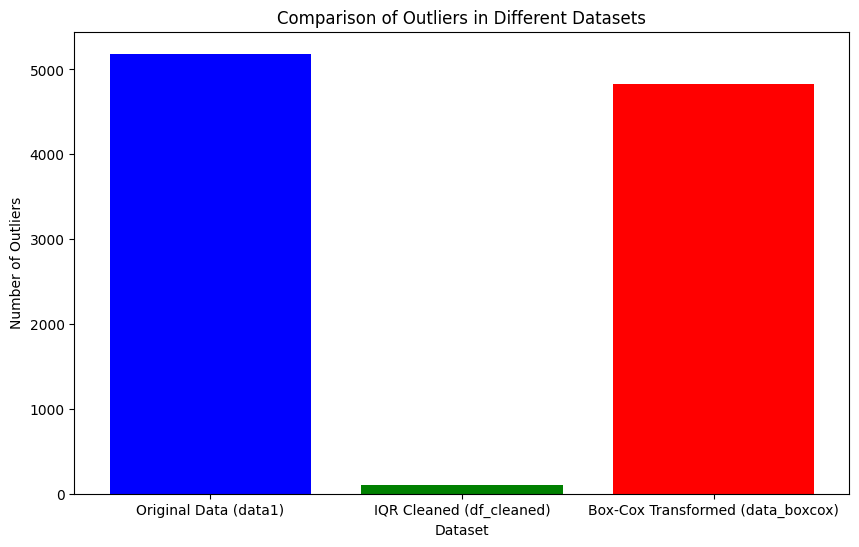

In [45]:
import matplotlib.pyplot as plt

# Sum the number of outliers for each dataset
outliers_sum_data1 = outliers_data1.sum()
outliers_sum_df_cleaned = outliers_df_cleaned.sum()
outliers_sum_data_boxcox = outliers_data_boxcox.sum()

# Create a bar plot to visually compare the number of outliers
labels = ['Original Data (data1)', 'IQR Cleaned (df_cleaned)', 'Box-Cox Transformed (data_boxcox)']
outliers_count = [outliers_sum_data1, outliers_sum_df_cleaned, outliers_sum_data_boxcox]

plt.figure(figsize=(10, 6))
plt.bar(labels, outliers_count, color=['blue', 'green', 'red'])

# Add titles and labels
plt.title('Comparison of Outliers in Different Datasets')
plt.xlabel('Dataset')
plt.ylabel('Number of Outliers')

# Show the plot
plt.show()


In [46]:
# Import necessary libraries
import pandas as pd

# Recalculate Mean, Median, Mode for df_cleaned (without SalesPrice)
mean_cleaned = df_cleaned.mean(numeric_only=True)
median_cleaned = df_cleaned.median(numeric_only=True)
mode_cleaned = df_cleaned.mode(numeric_only=True).iloc[0]  # Mode can return multiple values, take the first

print("Mean:\n", mean_cleaned)
print("\nMedian:\n", median_cleaned)
print("\nMode:\n", mode_cleaned)


# Recalculate Standard Deviation and Variance for df_cleaned (without SalesPrice)
std_cleaned = df_cleaned.std(numeric_only=True)
var_cleaned = df_cleaned.var(numeric_only=True)

print("\nStandard Deviation:\n", std_cleaned)
print("\nVariance:\n", var_cleaned)


Mean:
 MSSubClass              46.486486
MSZoning                 3.000000
LotFrontage             70.873641
LotArea               9706.418919
Street                   2.000000
                        ...      
YrSold                2007.837838
SaleType                 2.000000
SaleCondition            1.000000
SalePrice           196668.000000
NeighborhoodRank         7.847181
Length: 78, dtype: float64

Median:
 MSSubClass              60.000000
MSZoning                 3.000000
LotFrontage             70.049958
LotArea               9246.500000
Street                   2.000000
                        ...      
YrSold                2008.000000
SaleType                 2.000000
SaleCondition            1.000000
SalePrice           189000.000000
NeighborhoodRank         3.000000
Length: 78, dtype: float64

Mode:
 MSSubClass              60.000000
MSZoning                 3.000000
LotFrontage             70.049958
LotArea               8450.000000
Street                   2.000000
   

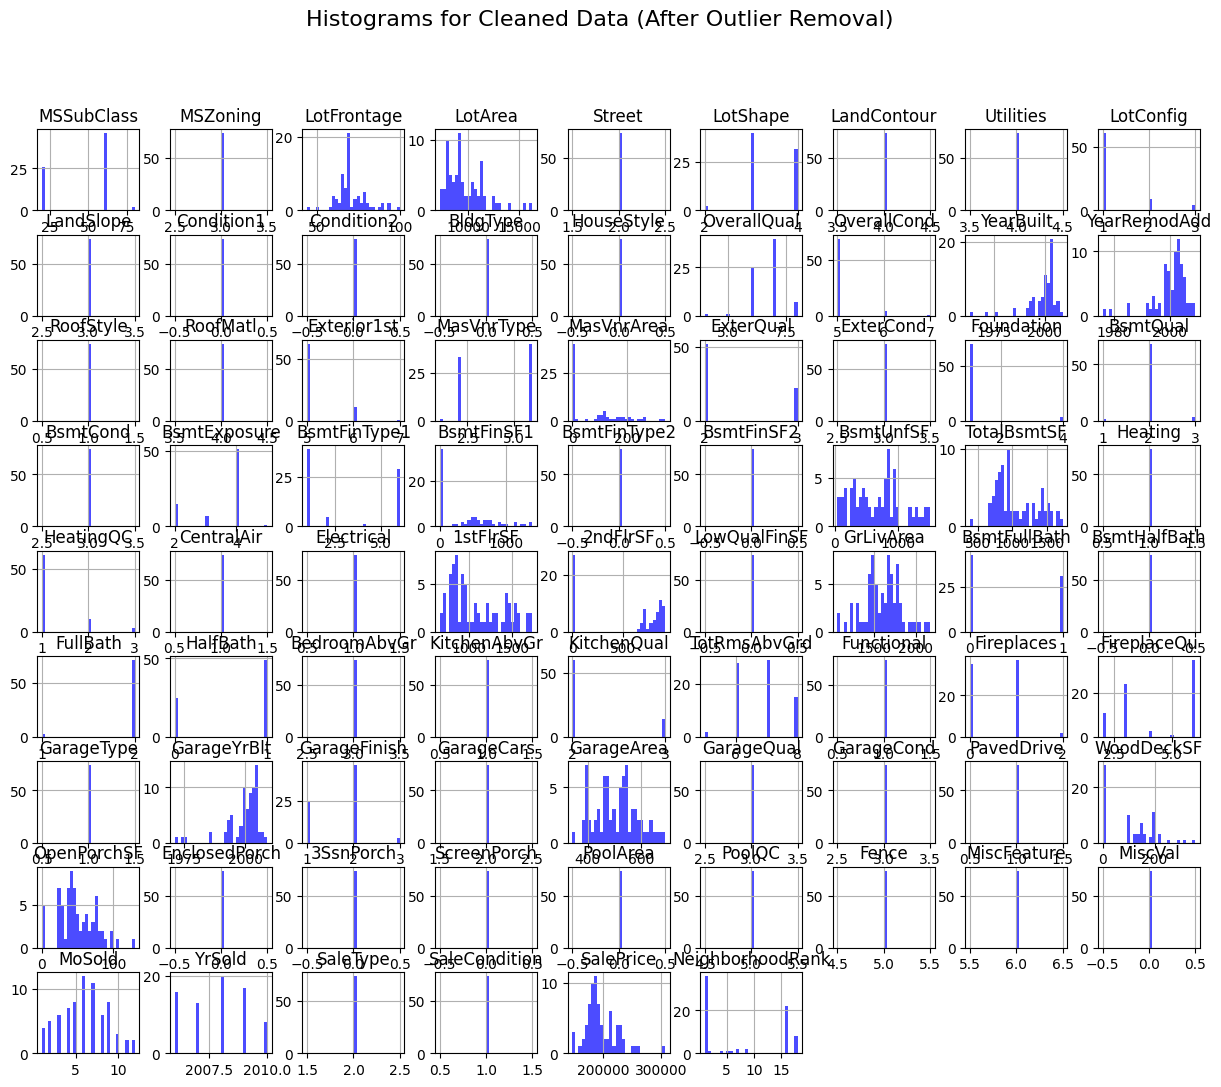

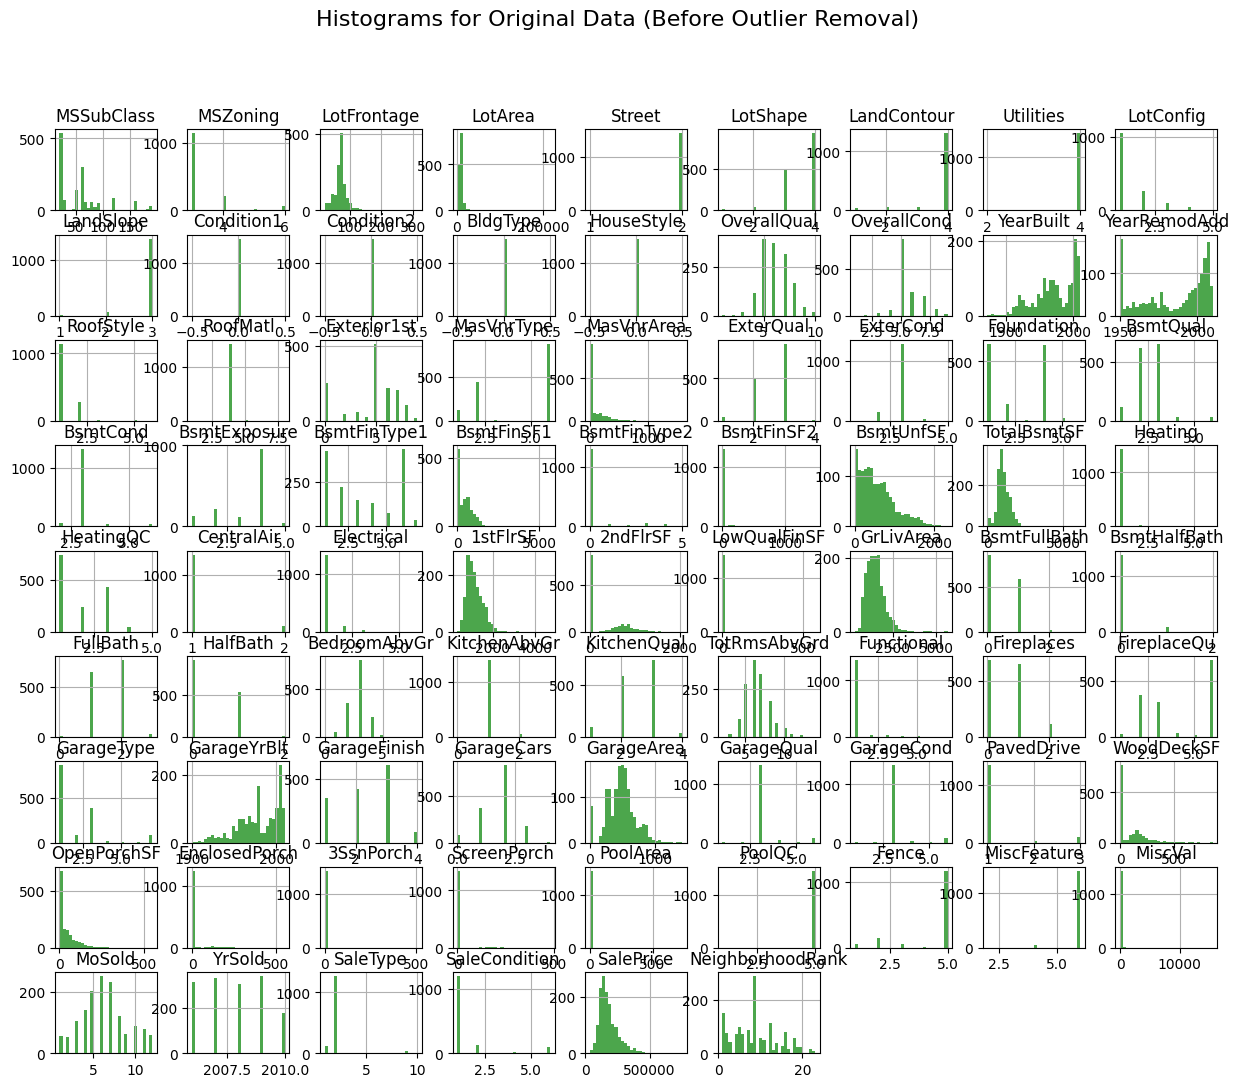

In [47]:
# Check if 'SalesPrice' exists in the dataframes and drop if it does
if 'SalesPrice' in df_cleaned.columns:
    df_cleaned_numeric = df_cleaned.drop(columns=['SalesPrice'])
else:
    df_cleaned_numeric = df_cleaned

if 'SalesPrice' in data1.columns:
    data1_numeric = data1.drop(columns=['SalesPrice'])
else:
    data1_numeric = data1

# Create histograms for the cleaned data
df_cleaned_numeric.hist(figsize=(15, 12), bins=30, color='blue', alpha=0.7)
plt.suptitle("Histograms for Cleaned Data (After Outlier Removal)", fontsize=16)
plt.show()

# Create histograms for the original data
data1_numeric.hist(figsize=(15, 12), bins=30, color='green', alpha=0.7)
plt.suptitle("Histograms for Original Data (Before Outlier Removal)", fontsize=16)
plt.show()


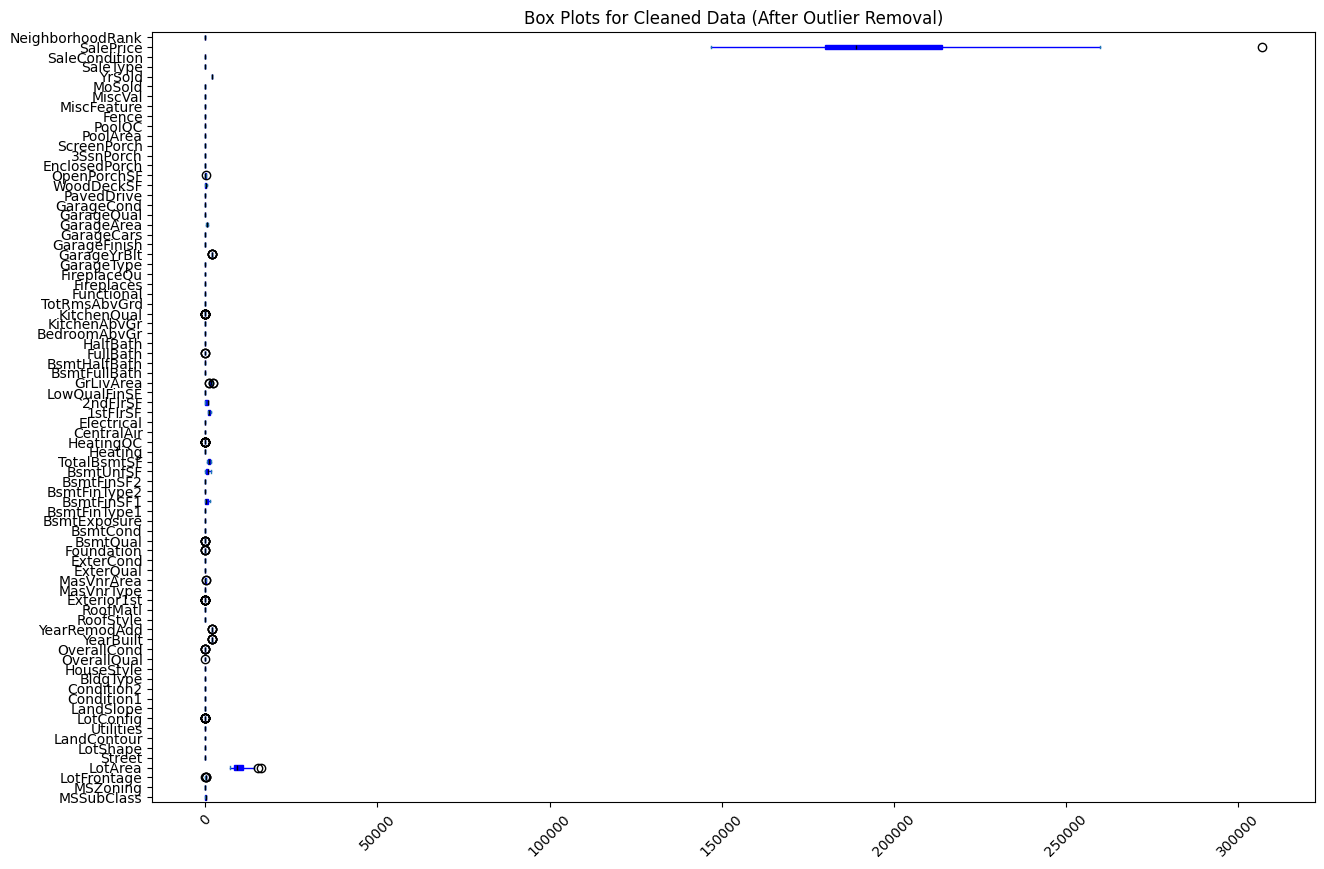

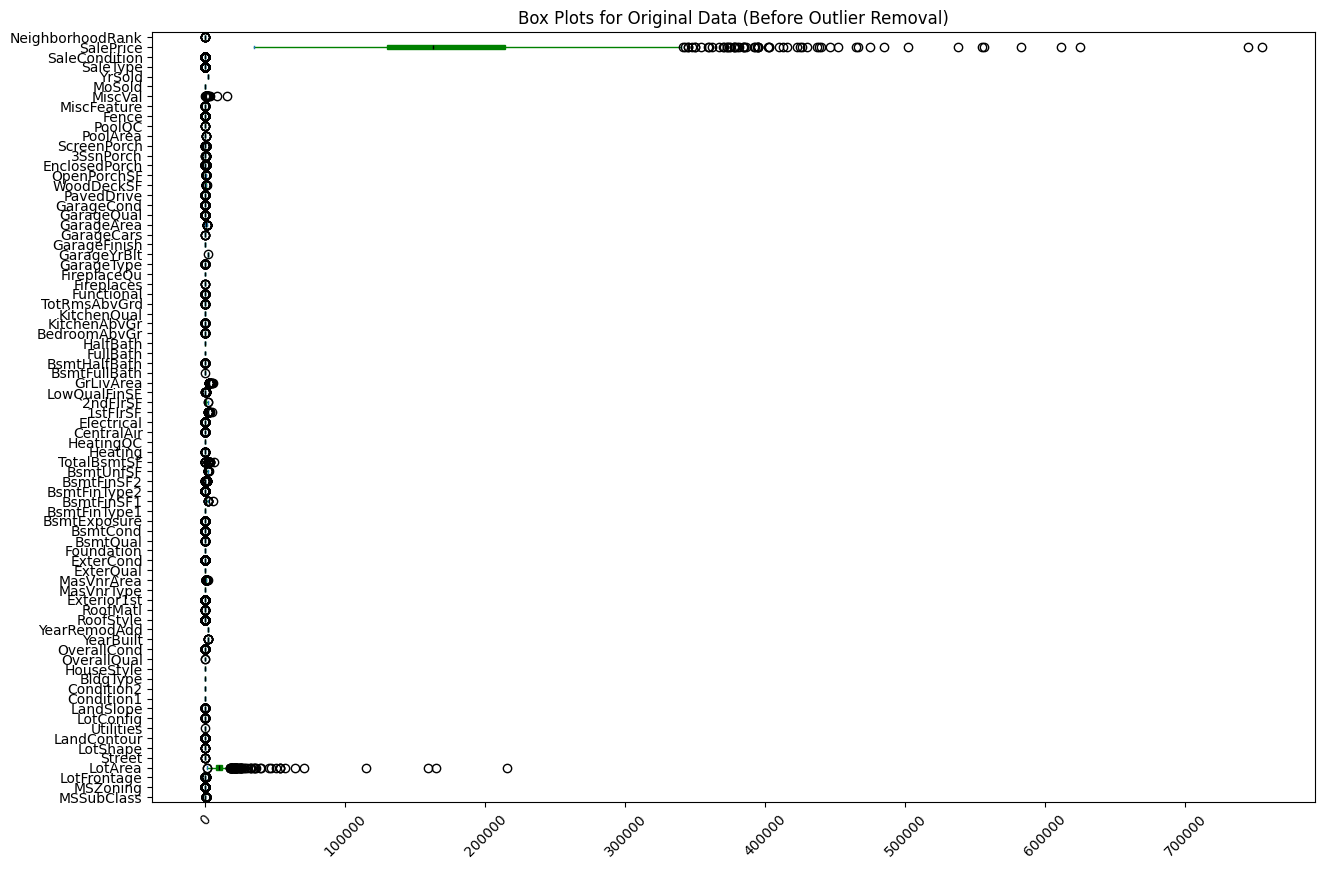

In [48]:
# Create box plots for the cleaned data
df_cleaned_numeric.plot(kind='box', figsize=(15, 10), vert=False, patch_artist=True, color=dict(boxes='blue', whiskers='blue', medians='black'))
plt.title("Box Plots for Cleaned Data (After Outlier Removal)")
plt.xticks(rotation=45)  # Add rotation here for cleaned data plot
plt.show()

# Create box plots for the original data
data1_numeric.plot(kind='box', figsize=(15, 10), vert=False, patch_artist=True, color=dict(boxes='green', whiskers='green', medians='black'))
plt.title("Box Plots for Original Data (Before Outlier Removal)")
plt.xticks(rotation=45)  # Add rotation here for original data plot
plt.show()

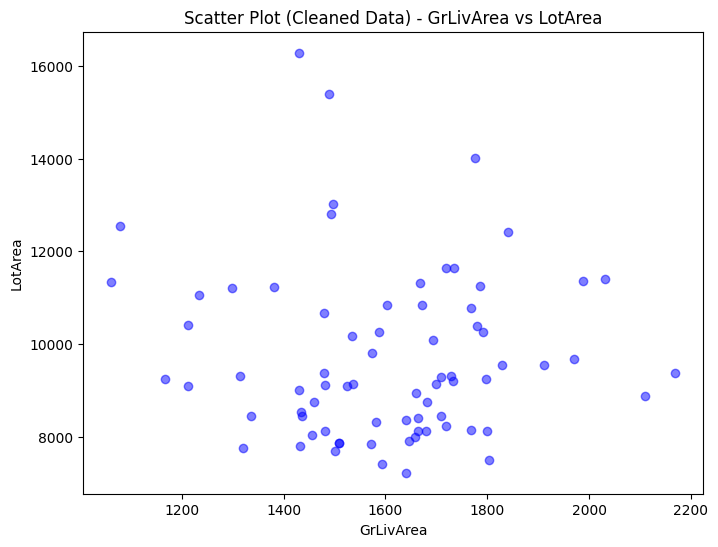

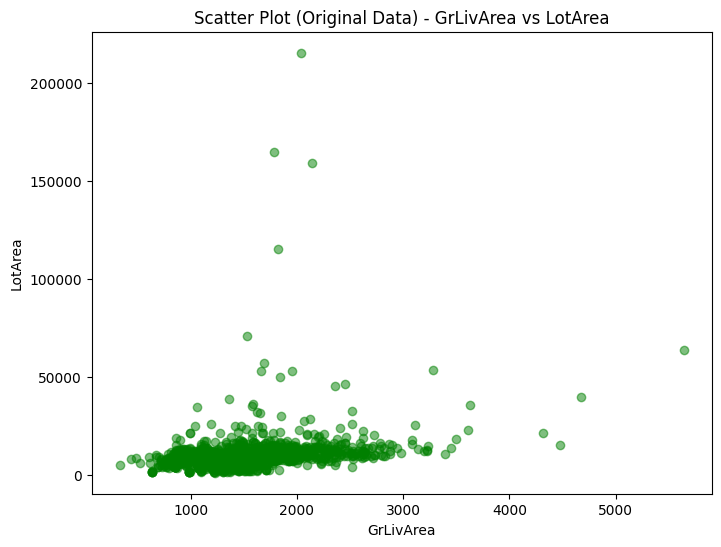

In [49]:
# Scatter plot for cleaned data
plt.figure(figsize=(8, 6))
plt.scatter(df_cleaned_numeric['GrLivArea'], df_cleaned_numeric['LotArea'], color='blue', alpha=0.5)
plt.title('Scatter Plot (Cleaned Data) - GrLivArea vs LotArea')
plt.xlabel('GrLivArea')
plt.ylabel('LotArea')
plt.show()

# Scatter plot for original data
plt.figure(figsize=(8, 6))
plt.scatter(data1_numeric['GrLivArea'], data1_numeric['LotArea'], color='green', alpha=0.5)
plt.title('Scatter Plot (Original Data) - GrLivArea vs LotArea')
plt.xlabel('GrLivArea')
plt.ylabel('LotArea')
plt.show()


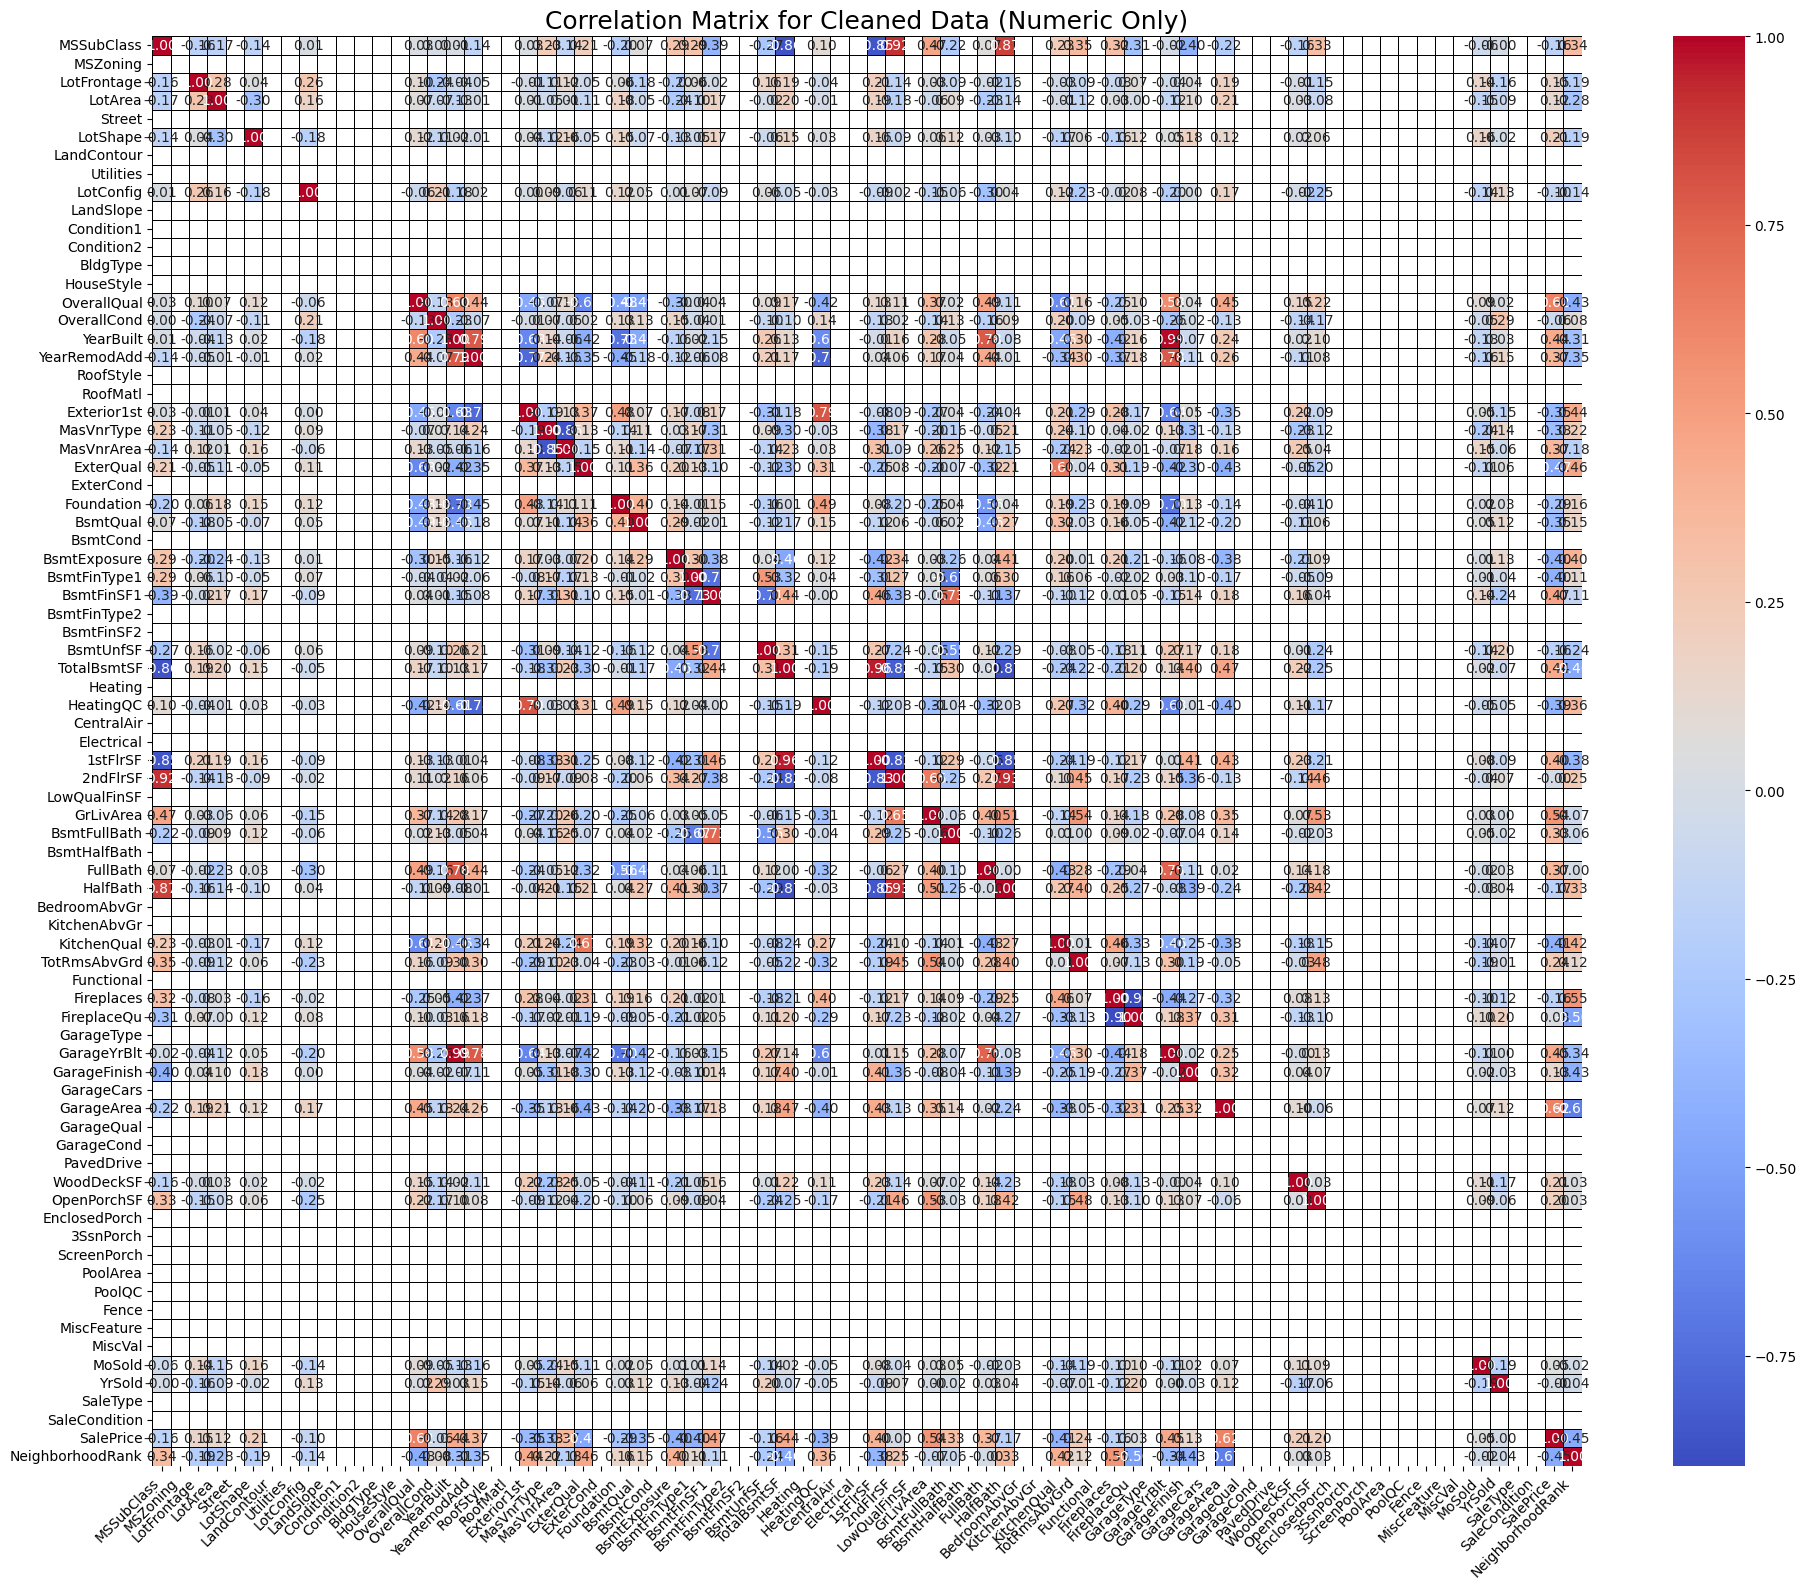

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns from df_cleaned
df_cleaned_numeric = df_cleaned.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = df_cleaned_numeric.corr()

# Set up the matplotlib figure with increased size
plt.figure(figsize=(20, 16))

# Create a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, 
            linewidths=0.5, linecolor='black', xticklabels=True, yticklabels=True)

# Rotate the x-axis and y-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Set the title
plt.title('Correlation Matrix for Cleaned Data (Numeric Only)', fontsize=18)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


In [51]:
column = df_cleaned.columns 
for i in column:
    print(df_cleaned.dtypes[i])

int64
float64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
object
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
int64
float64


In [52]:
for column in df_cleaned.columns:
    unique_values = df_cleaned[column].unique()
    print(f"Unique values in column '{column}': {unique_values}") 


Unique values in column 'MSSubClass': [60 20 80]
Unique values in column 'MSZoning': [3.]
Unique values in column 'LotFrontage': [ 65.          68.          75.          85.          89.
  72.          78.          77.          62.          83.
  70.04995837  71.          70.          60.          79.
  93.         100.          76.          80.          64.
  88.          67.          44.          63.          90.
  59.          58.          51.        ]
Unique values in column 'LotArea': [ 8450 11250 10084 11049 11645 10665 10264  9206  8244  9017 10420  8880
 11317  8366  7685  7795  9135  9248  8121  8123  9245  9382 10839  9291
  9554 10171  8320 12803  7861  8125 11404  9313  7750 10769 16285 11333
  7226  8529  9548  8750  7875  9675 14006  8400 11367  7837  8749 13031
  9317  8000  9125 11200 10852  8935  7500  8029  9100 11235 10400 15384
  8158  9808  9375 12537  7415 12420 10261  7917]
Unique values in column 'Street': [2]
Unique values in column 'LotShape': [4 3 2]
Unique v

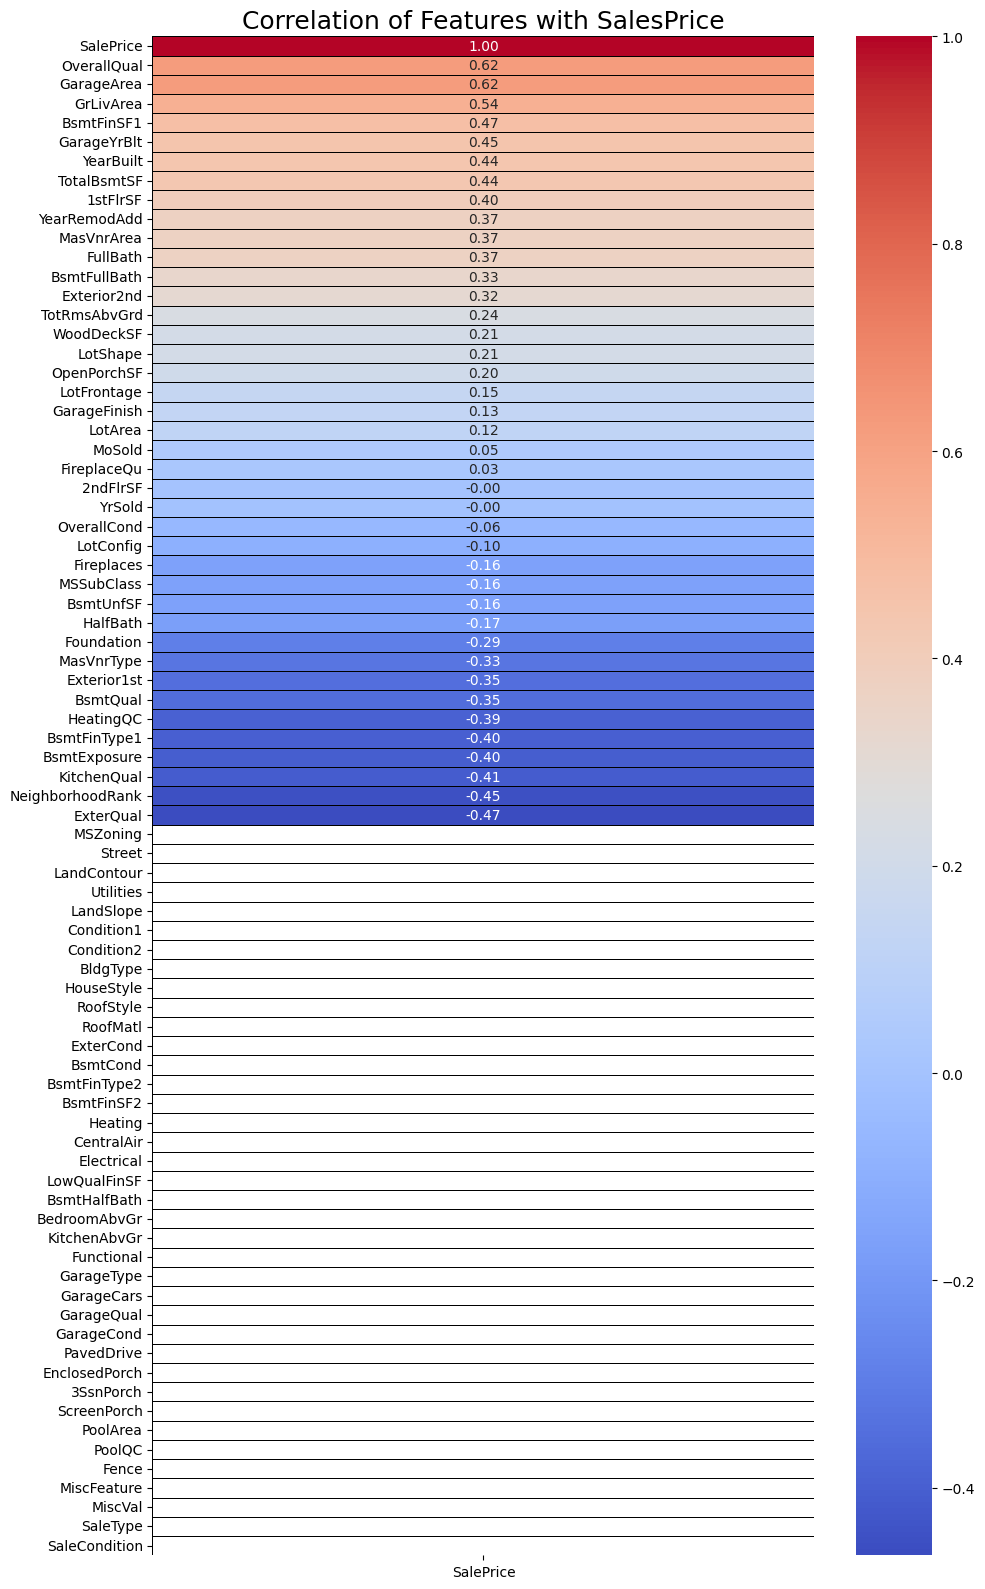

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Add the SalesPrice column to df_cleaned if it's missing from it
# Assuming SalesPrice is in data1 and you want to add it to df_cleaned
df_cleaned['SalePrice'] = data1['SalePrice']

# Step 2: Identify categorical columns that need encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Step 3: Define a function to encode categorical variables
def encode_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# Step 4: Apply encoding to the categorical columns
df_cleaned = encode_categorical(df_cleaned, categorical_cols)

# Step 5: Calculate the correlation matrix with respect to SalesPrice
correlation_matrix = df_cleaned.corr()

# Step 6: Visualize the correlation matrix with SalesPrice
plt.figure(figsize=(10, 16))

# Create a heatmap for features correlated with SalesPrice
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Set title
plt.title('Correlation of Features with SalesPrice', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define features and target
X = df_cleaned[['OverallQual', 'GarageArea', 'GrLivArea', 'BsmtFinSF1', 'GarageYrBlt', 'YearBuilt', 'TotalBsmtSF']]
y = df_cleaned['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')



Mean Squared Error: 167232651.4432788


In [55]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 169708578.07685664


In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 207531537.07775995


In [57]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 297138268.71351635


In [58]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 429714858.9886719


In [59]:
!pip install lightgbm


In [60]:
import lightgbm as lgb

model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000325 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 7
[LightGBM] [Info] Start training from score 196764.949153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

In [61]:
from sklearn.svm import SVR

model = SVR(kernel='rbf', C=100, gamma=0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')


Mean Squared Error: 373484666.3835542


In [65]:
# Assuming all models have already been trained and defined earlier

# Example model definitions (if you haven't defined them yet):
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb

# Initialize models (you should train them before running this step)
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train)

# Dictionary to store model performance
model_performance = {
    'Model': [],
    'R2 Score': [],
    'MAE': [],
    'RMSE': []
}

# List of all models
models = [
    ('Linear Regression', linear_model),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgb_model)
]

# Loop through each model to compute performance metrics
for name, model in models:
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute the metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    model_performance['Model'].append(name)
    model_performance['R2 Score'].append(r2)
    model_performance['MAE'].append(mae)
    model_performance['RMSE'].append(rmse)

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display the performance metrics
print(performance_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000907 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 109
[LightGBM] [Info] Number of data points in the train set: 59, number of used features: 7
[LightGBM] [Info] Start training from score 196764.949153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [66]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best CV R2 Score: {best_score}")


Best Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
Best CV R2 Score: 0.6548821568489075


In [67]:
# Import XGBoost
from xgboost import XGBRegressor

# Initialize XGBoost with best hyperparameters
best_xgb_model = XGBRegressor(learning_rate=0.3, max_depth=3, n_estimators=50, random_state=42)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the performance on test set
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost - R2 Score: {r2_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")


XGBoost - R2 Score: 0.2603512406349182, MAE: 10920.463541666666, RMSE: 15015.214227930976


In [68]:
# Append XGBoost performance to the model_performance dictionary
model_performance['Model'].append('XGBoost (Tuned)')
model_performance['R2 Score'].append(r2_xgb)
model_performance['MAE'].append(mae_xgb)
model_performance['RMSE'].append(rmse_xgb)

# Convert the dictionary to a DataFrame for easy viewing
model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)


               Model  R2 Score           MAE          RMSE
0  Linear Regression  0.451365  10092.210103  12931.846405
1      Random Forest  0.319158  10827.797333  14405.954917
2            XGBoost -0.409753  13531.760417  20729.564853
3           LightGBM  0.150290  14234.786177  16093.633894
4    XGBoost (Tuned)  0.260351  10920.463542  15015.214228


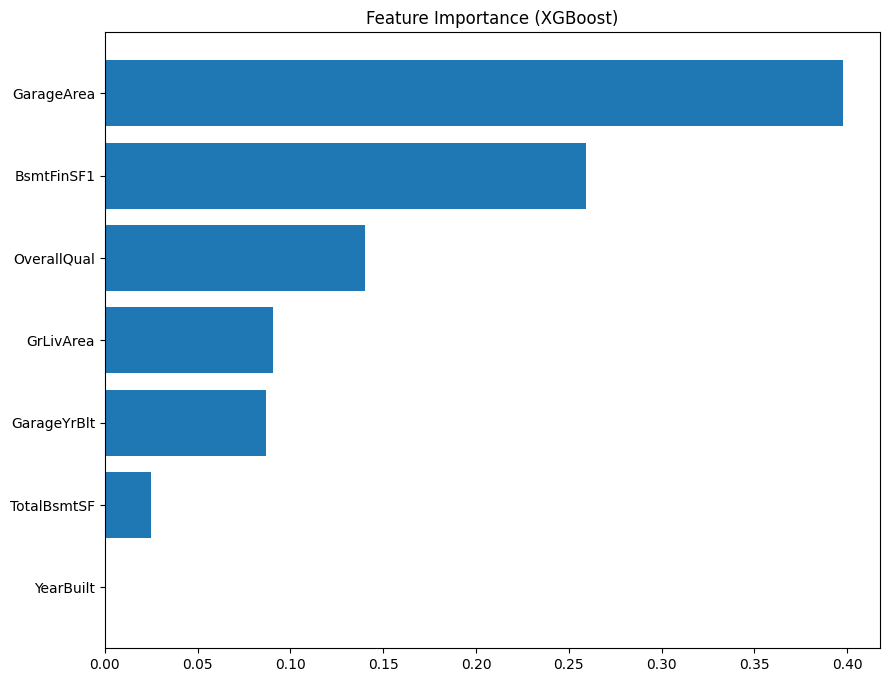

In [83]:
# Plot feature importance for XGBoost
import matplotlib.pyplot as plt

xgb_importance = best_xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), xgb_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title('Feature Importance (XGBoost)')
plt.show()


In [69]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the final model
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')

print(f'Cross-Validated R2 Score: {cv_scores.mean()}')


Cross-Validated R2 Score: 0.6355125308036804


In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits


c:\Users\user\Python39\lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [72]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(learning_rate=0.3, max_depth=3, n_estimators=50, random_state=42))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)

r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"Stacking - R2 Score: {r2_stack}, MAE: {mae_stack}, RMSE: {rmse_stack}")


Stacking - R2 Score: 0.1844849431359945, MAE: 11554.009329113433, RMSE: 15766.480031782748


In [73]:
# Predict on new data (if available)
final_predictions = best_xgb_model.predict(new_data)
print(final_predictions)


NameError: name 'new_data' is not defined

In [74]:
import joblib

# Save the model to a file
joblib.dump(best_xgb_model, 'xgboost_best_model.pkl')

# Load the model back for future use
loaded_model = joblib.load('xgboost_best_model.pkl')


In [75]:
# Summarize results in a report
print(model_performance_df)


               Model  R2 Score           MAE          RMSE
0  Linear Regression  0.451365  10092.210103  12931.846405
1      Random Forest  0.319158  10827.797333  14405.954917
2            XGBoost -0.409753  13531.760417  20729.564853
3           LightGBM  0.150290  14234.786177  16093.633894
4    XGBoost (Tuned)  0.260351  10920.463542  15015.214228


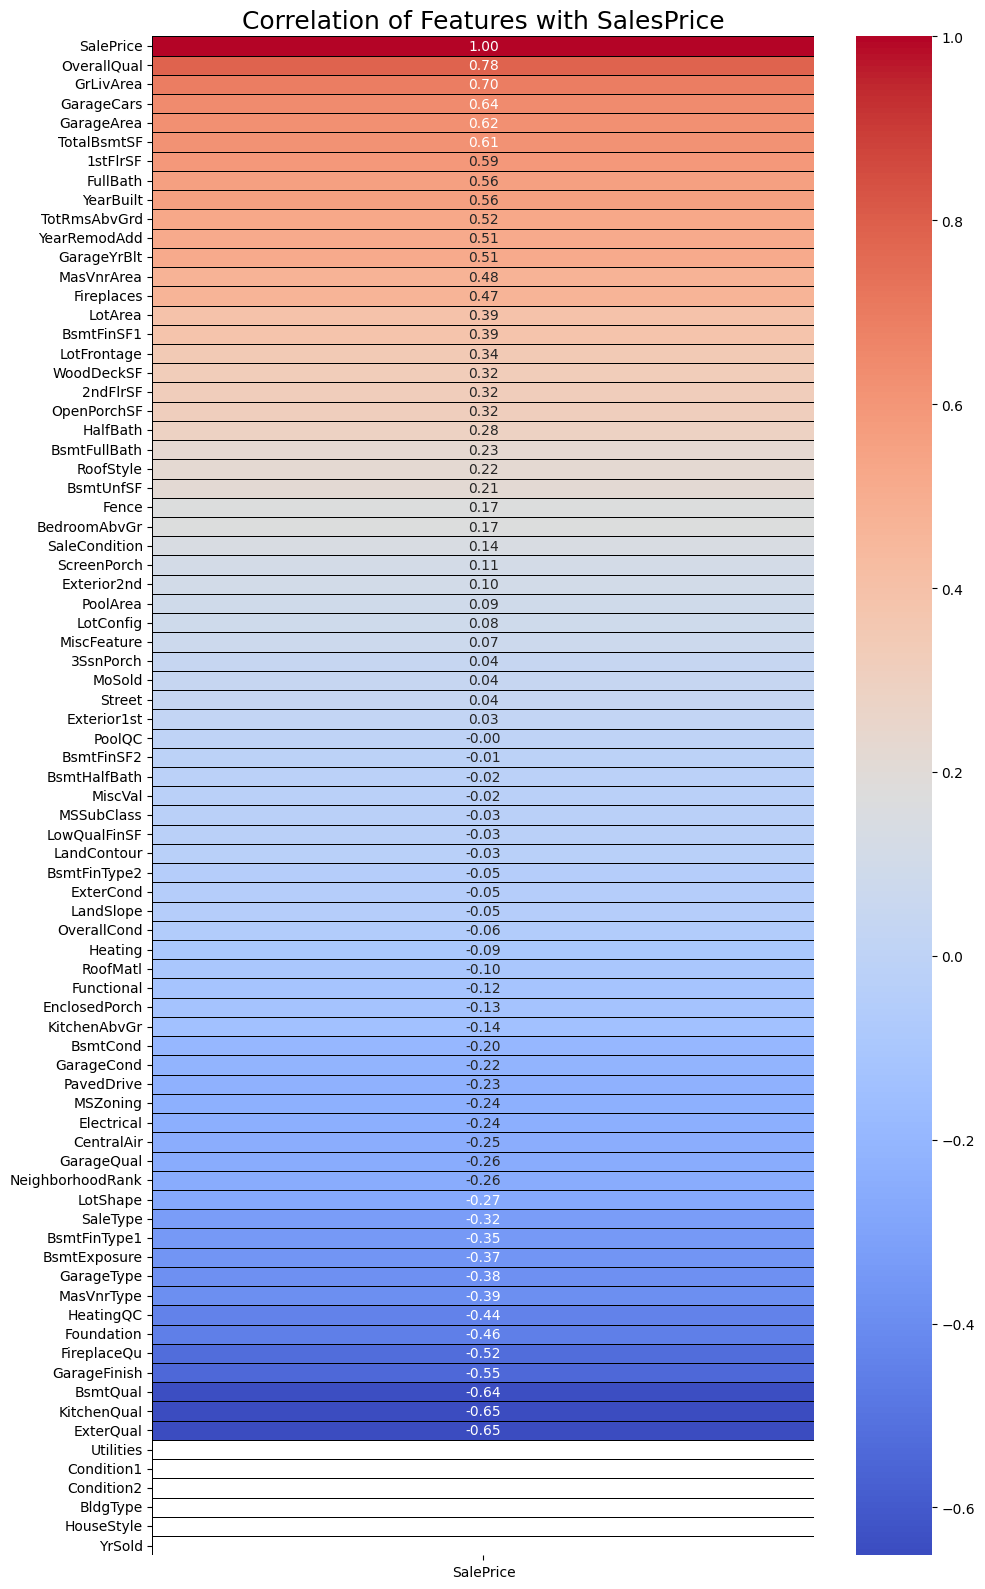

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_cleaned = data_boxcox.copy() 

# Step 1: Add the SalesPrice column to df_cleaned if it's missing from it
# Assuming SalesPrice is in data1 and you want to add it to df_cleaned
df_cleaned['SalePrice'] = data1['SalePrice']

# Step 2: Identify categorical columns that need encoding
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

# Step 3: Define a function to encode categorical variables
def encode_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category').cat.codes
    return df

# Step 4: Apply encoding to the categorical columns
df_cleaned = encode_categorical(df_cleaned, categorical_cols)

# Step 5: Calculate the correlation matrix with respect to SalesPrice
correlation_matrix = df_cleaned.corr()

# Step 6: Visualize the correlation matrix with SalesPrice
plt.figure(figsize=(10, 16))

# Create a heatmap for features correlated with SalesPrice
sns.heatmap(correlation_matrix[['SalePrice']].sort_values(by='SalePrice', ascending=False), 
            annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5, linecolor='black')

# Set title
plt.title('Correlation of Features with SalesPrice', fontsize=18)

# Show the plot
plt.tight_layout()
plt.show()



In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Replace inf and -inf with NaN
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

# Remove rows with NaN values
df_cleaned.dropna(inplace=True)

# Optionally: Cap large values (you can set your threshold)
cap_threshold = np.finfo(np.float32).max  # For float32
df_cleaned = df_cleaned.clip(upper=cap_threshold)

# Define features and target
X = df_cleaned[['OverallQual', 'GarageArea', 'GrLivArea', 'GarageYrBlt', 'YearBuilt', 'TotalBsmtSF', 'GarageCars', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces']]
y = df_cleaned['SalePrice']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
linear_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train models
linear_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)
lgb_model.fit(X_train, y_train)

# Dictionary to store model performance
model_performance = {
    'Model': [],
    'R2 Score': [],
    'MAE': [],
    'RMSE': []
}

# List of all models
models = [
    ('Linear Regression', linear_model),
    ('Random Forest', rf_model),
    ('XGBoost', xgb_model),
    ('LightGBM', lgb_model)
]

# Loop through each model to compute performance metrics
for name, model in models:
    # Predict on test set
    y_pred = model.predict(X_test)

    # Compute the metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store the results
    model_performance['Model'].append(name)
    model_performance['R2 Score'].append(r2)
    model_performance['MAE'].append(mae)
    model_performance['RMSE'].append(rmse)

# Convert the dictionary to a DataFrame for better visualization
performance_df = pd.DataFrame(model_performance)

# Display the performance metrics
print(performance_df)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000370 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1215
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 10
[LightGBM] [Info] Start training from score 181441.541952
               Model  R2 Score            MAE           RMSE
0  Linear Regression -4.169794  178839.811644  199133.132442
1      Random Forest  0.882554   19423.188797   30014.185589
2            XGBoost  0.852879   21669.345890   33592.610425
3           LightGBM  0.840644   21523.325097   34961.561567


In [80]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb.XGBRegressor(random_state=42),
                           param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best CV R2 Score: {best_score}")


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best CV R2 Score: 0.8069392681121826


In [81]:
# Import XGBoost
from xgboost import XGBRegressor

# Initialize XGBoost with best hyperparameters
best_xgb_model = XGBRegressor(learning_rate=0.3, max_depth=3, n_estimators=50, random_state=42)

# Fit the model on the training data
best_xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = best_xgb_model.predict(X_test)

# Evaluate the performance on test set
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"XGBoost - R2 Score: {r2_xgb}, MAE: {mae_xgb}, RMSE: {rmse_xgb}")


XGBoost - R2 Score: 0.8499113321304321, MAE: 21781.597602739726, RMSE: 33929.76267507301


In [82]:
# Append XGBoost performance to the model_performance dictionary
model_performance['Model'].append('XGBoost (Tuned)')
model_performance['R2 Score'].append(r2_xgb)
model_performance['MAE'].append(mae_xgb)
model_performance['RMSE'].append(rmse_xgb)

# Convert the dictionary to a DataFrame for easy viewing
model_performance_df = pd.DataFrame(model_performance)
print(model_performance_df)


               Model  R2 Score            MAE           RMSE
0  Linear Regression -4.169794  178839.811644  199133.132442
1      Random Forest  0.882554   19423.188797   30014.185589
2            XGBoost  0.852879   21669.345890   33592.610425
3           LightGBM  0.840644   21523.325097   34961.561567
4    XGBoost (Tuned)  0.849911   21781.597603   33929.762675


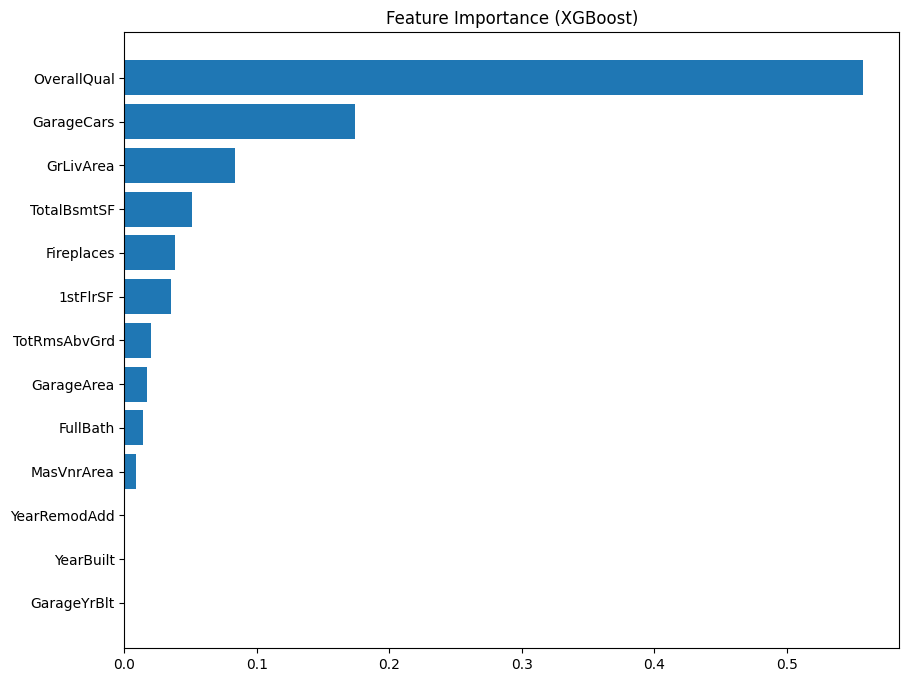

In [83]:
# Plot feature importance for XGBoost
import matplotlib.pyplot as plt

xgb_importance = best_xgb_model.feature_importances_
sorted_idx = np.argsort(xgb_importance)

plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), xgb_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), X_train.columns[sorted_idx])
plt.title('Feature Importance (XGBoost)')
plt.show()


In [84]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the final model
cv_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='r2')

print(f'Cross-Validated R2 Score: {cv_scores.mean()}')


Cross-Validated R2 Score: 0.816136610507965


In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters for Random Forest: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [86]:
from sklearn.ensemble import StackingRegressor

estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('xgb', XGBRegressor(learning_rate=0.3, max_depth=3, n_estimators=50, random_state=42))
]

stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

stacking_regressor.fit(X_train, y_train)
y_pred_stack = stacking_regressor.predict(X_test)

r2_stack = r2_score(y_test, y_pred_stack)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

print(f"Stacking - R2 Score: {r2_stack}, MAE: {mae_stack}, RMSE: {rmse_stack}")


Stacking - R2 Score: 0.8682382429266589, MAE: 20308.259253439326, RMSE: 31790.810911089895


In [87]:
import joblib

# Save the model to a file
joblib.dump(best_xgb_model, 'xgboost_best_model.pkl')

# Load the model back for future use
loaded_model = joblib.load('xgboost_best_model.pkl')
